In [1]:
import os
from statsmodels.tsa.arima.model import ARIMA
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

In [ ]:

file_path = "../data/5M/INTC_5M.csv"
df = pd.read_csv(file_path)

df["timestamp"] = pd.to_datetime(df["Datetime"], utc=True, errors='coerce')
df = df.drop(columns=["Datetime"])

# Drop rows where timestamp conversion resulted in NaT (Not a Time)
df.dropna(subset=["timestamp"], inplace=True)

# Convert timezone-aware datetime to timezone-naive datetime64[ns]
# AutoGluon requires timezone-naive timestamps
df["timestamp"] = df["timestamp"].dt.tz_localize(None)

print("Timestamp dtype:", df["timestamp"].dtype)
print("Sample timestamps:", df["timestamp"].head())

df = df.sort_values("timestamp").drop_duplicates()

df["item_id"] = "INTC"
# Select relevant columns and create the TimeSeriesDataFrame
df = df[["item_id", "timestamp", "Close"]]

# Create TimeSeriesDataFrame
data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="timestamp",
)

data = data.convert_frequency(freq="5T")
data.head(); data.tail() ; data.info()

Timestamp dtype: datetime64[ns]
Sample timestamps: 0   2025-01-23 09:00:00
1   2025-01-23 09:05:00
2   2025-01-23 09:10:00
3   2025-01-23 09:15:00
4   2025-01-23 09:20:00
Name: timestamp, dtype: datetime64[ns]


c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\autogluon\timeseries\dataset\ts_dataframe.py:1009: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  offset = pd.tseries.frequencies.to_offset(freq)


<class 'autogluon.timeseries.dataset.ts_dataframe.TimeSeriesDataFrame'>
MultiIndex: 24372 entries, ('INTC', Timestamp('2025-01-23 09:00:00')) to ('INTC', Timestamp('2025-04-17 23:55:00'))
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   11089 non-null  float64
dtypes: float64(1)
memory usage: 452.3+ KB


In [3]:
%%capture
prediction_length = 40
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length, target="Close").fit(
    train_data, presets="bolt_small",
)

Beginning AutoGluon training...
AutoGluon will save models to 'c:\Users\micha\code\finance\diploma\notebooks\AutogluonModels\ag-20250720_140943'
AutoGluon will save models to 'c:\Users\micha\code\finance\diploma\notebooks\AutogluonModels\ag-20250720_140943'
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          32
GPU Count:          0
Memory Avail:       33.20 GB / 63.10 GB (52.6%)
Disk Space Avail:   116.53 GB / 465.02 GB (25.1%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 40,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection'

In [4]:
prediction_length = 40
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length, target="Close").fit(
    train_data, presets="bolt_small",
)

Beginning AutoGluon training...
AutoGluon will save models to 'c:\Users\micha\code\finance\diploma\notebooks\AutogluonModels\ag-20250720_140946'
AutoGluon will save models to 'c:\Users\micha\code\finance\diploma\notebooks\AutogluonModels\ag-20250720_140946'
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          32
GPU Count:          0
Memory Avail:       32.99 GB / 63.10 GB (52.3%)
Disk Space Avail:   116.53 GB / 465.02 GB (25.1%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 40,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection'


🔍 Making prediction #1 for window ending at 220
   Context data: rows 0 to 199 (200 rows)
   Test data: rows 200 to 219 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping metrics.

🔍 Making prediction #2 for window ending at 1052
   Context data: rows 832 to 1031 (200 rows)
   Test data: rows 1032 to 1051 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping metrics.

🔍 Making prediction #2 for window ending at 1052
   Context data: rows 832 to 1031 (200 rows)
   Test data: rows 1032 to 1051 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping metrics.

🔍 Making prediction #3 for window ending at 1885
   Context data: rows 1665 to 1864 (200 rows)
   Test data: rows 1865 to 1884 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping metrics.

🔍 Making prediction #3 for window ending at 1885
   Context data: rows 1665 to 1864 (200 rows)
   Test data: rows 1865 to 1884 (20 rows)
   📊 Plotting prediction #3...
   🎯

c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


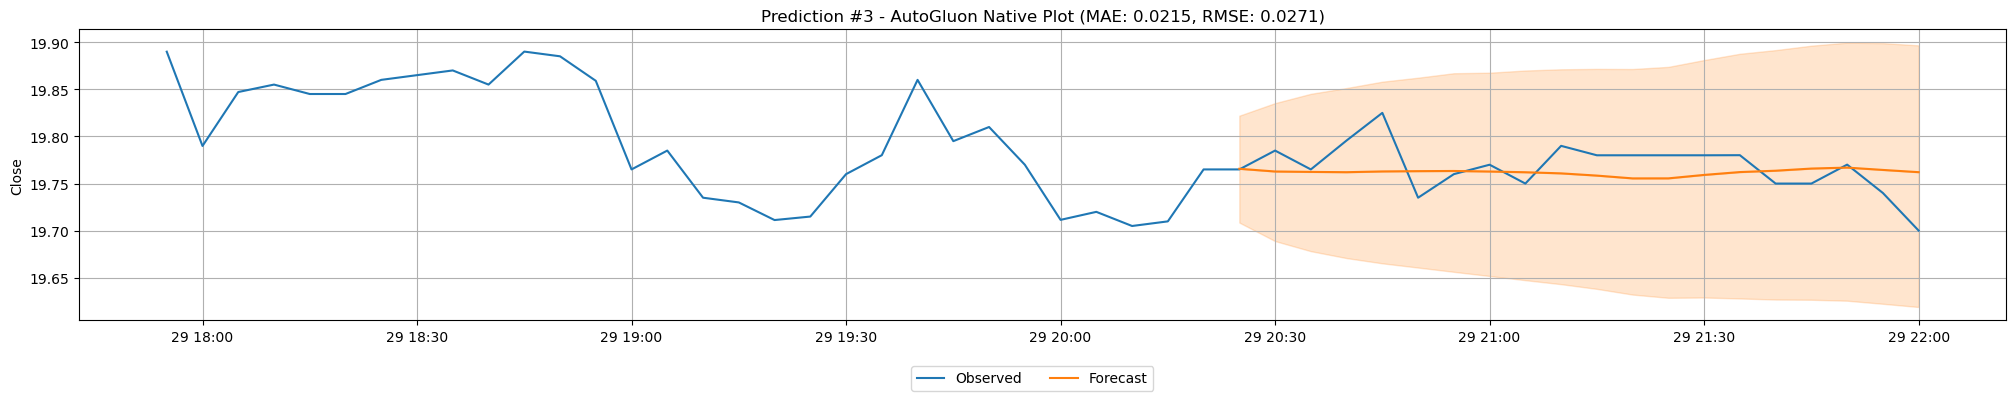

   📊 Custom comparison plot for prediction #3...


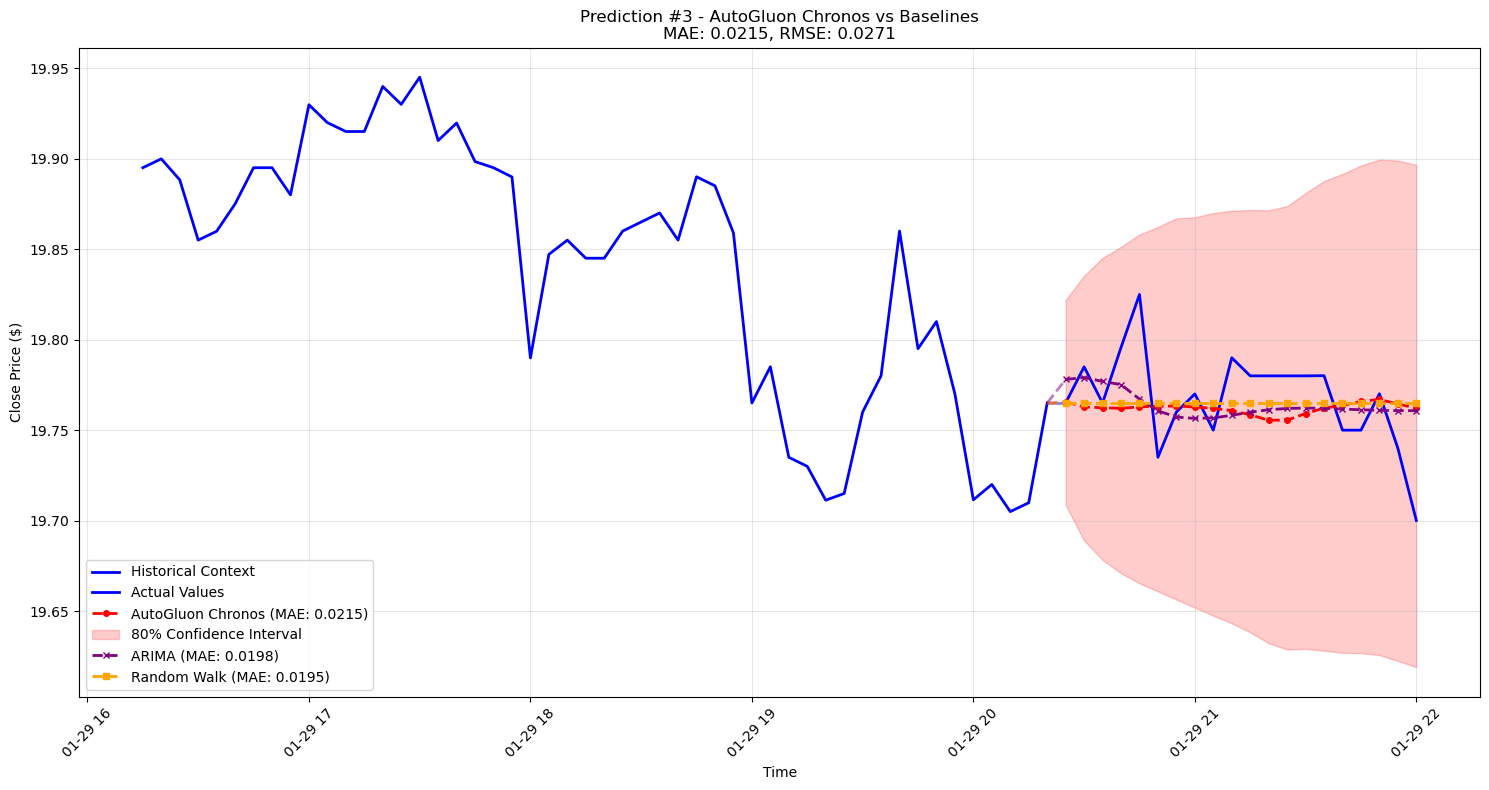

 ✅ AutoGluon - MAE: 0.0215, RMSE: 0.0271
 ✅ ARIMA     - MAE: 0.0198, RMSE: 0.0247
 ✅ Random W. - MAE: 0.0195, RMSE: 0.0257
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_3.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_3.csv

🔍 Making prediction #4 for window ending at 2718
   Context data: rows 2498 to 2697 (200 rows)
   Test data: rows 2698 to 2717 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping metrics.

🔍 Making prediction #5 for window ending at 3551
   Context data: rows 3331 to 3530 (200 rows)
   Test data: rows 3531 to 3550 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping metrics.

🔍 Making prediction #5 for window ending at 3551
   Context data: rows 3331 to 3530 (200 rows)
   Test data: rows 3531 to 3550 (20 rows)
   📊 Plotting prediction #5...
   🎯 AutoGluon native plot for prediction #5...
  

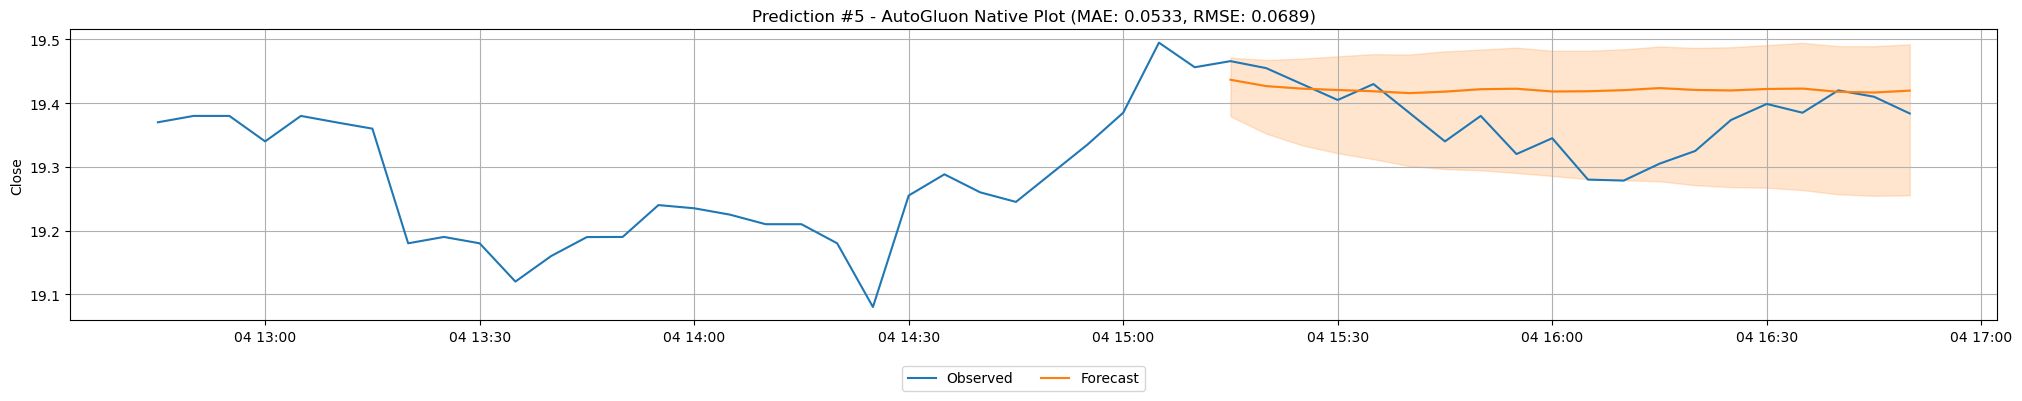

   📊 Custom comparison plot for prediction #5...


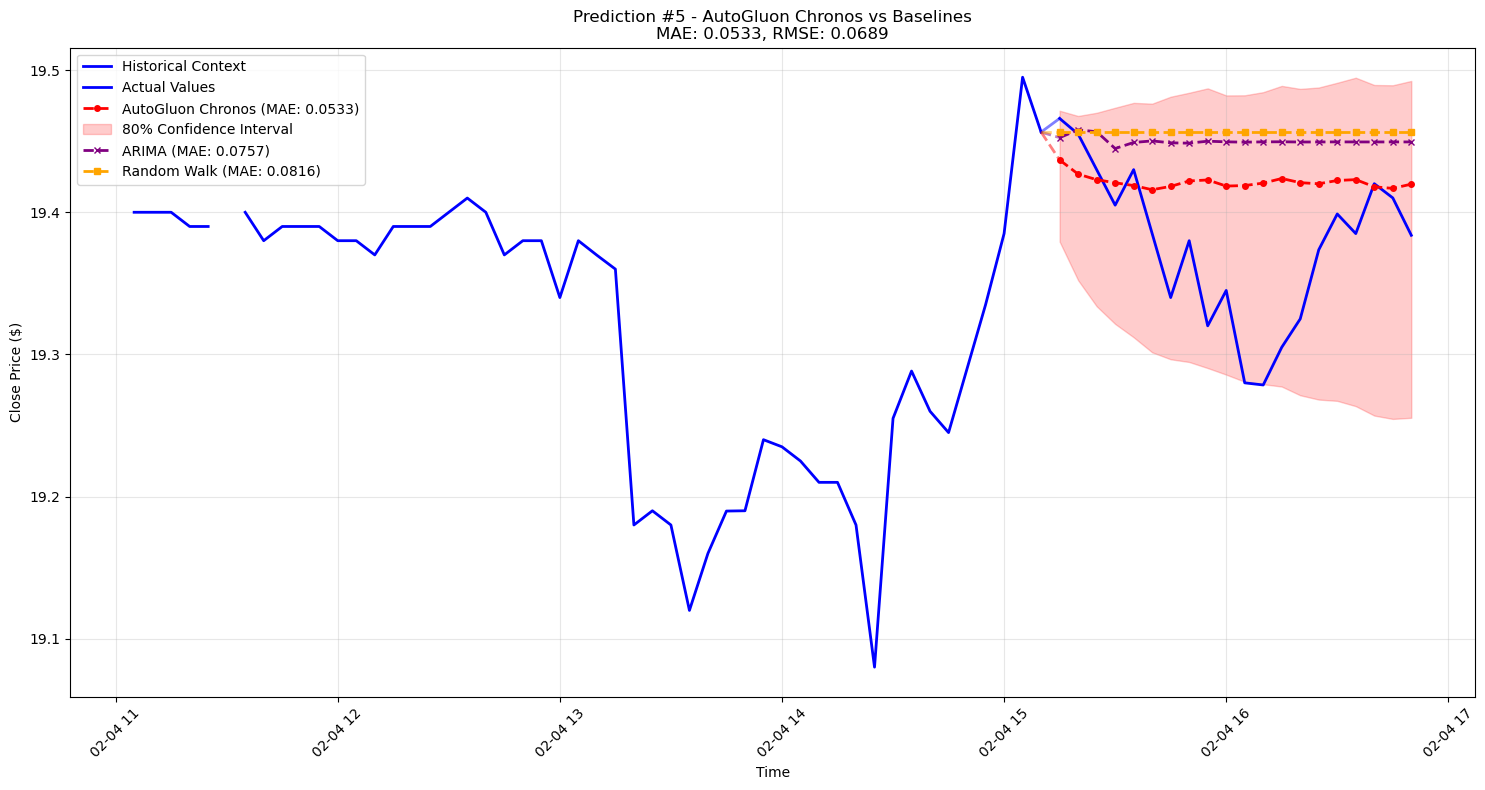

 ✅ AutoGluon - MAE: 0.0533, RMSE: 0.0689
 ✅ ARIMA     - MAE: 0.0757, RMSE: 0.0908
 ✅ Random W. - MAE: 0.0816, RMSE: 0.0966
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_5.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_5.csv

🔍 Making prediction #6 for window ending at 4384
   Context data: rows 4164 to 4363 (200 rows)
   Test data: rows 4364 to 4383 (20 rows)
   ⚠️ Error generating baseline forecasts: Input contains NaN.
   📊 Plotting prediction #6...
   🎯 AutoGluon native plot for prediction #6...
   ⚠️ Error generating baseline forecasts: Input contains NaN.
   📊 Plotting prediction #6...
   🎯 AutoGluon native plot for prediction #6...


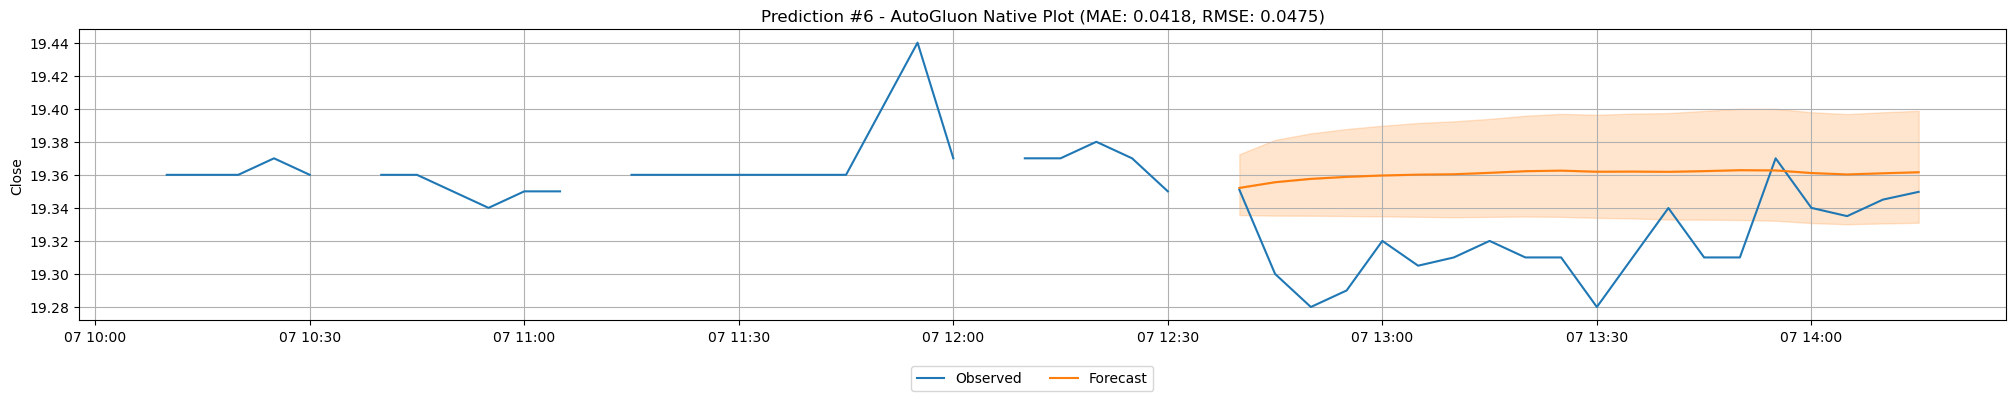

   📊 Custom comparison plot for prediction #6...


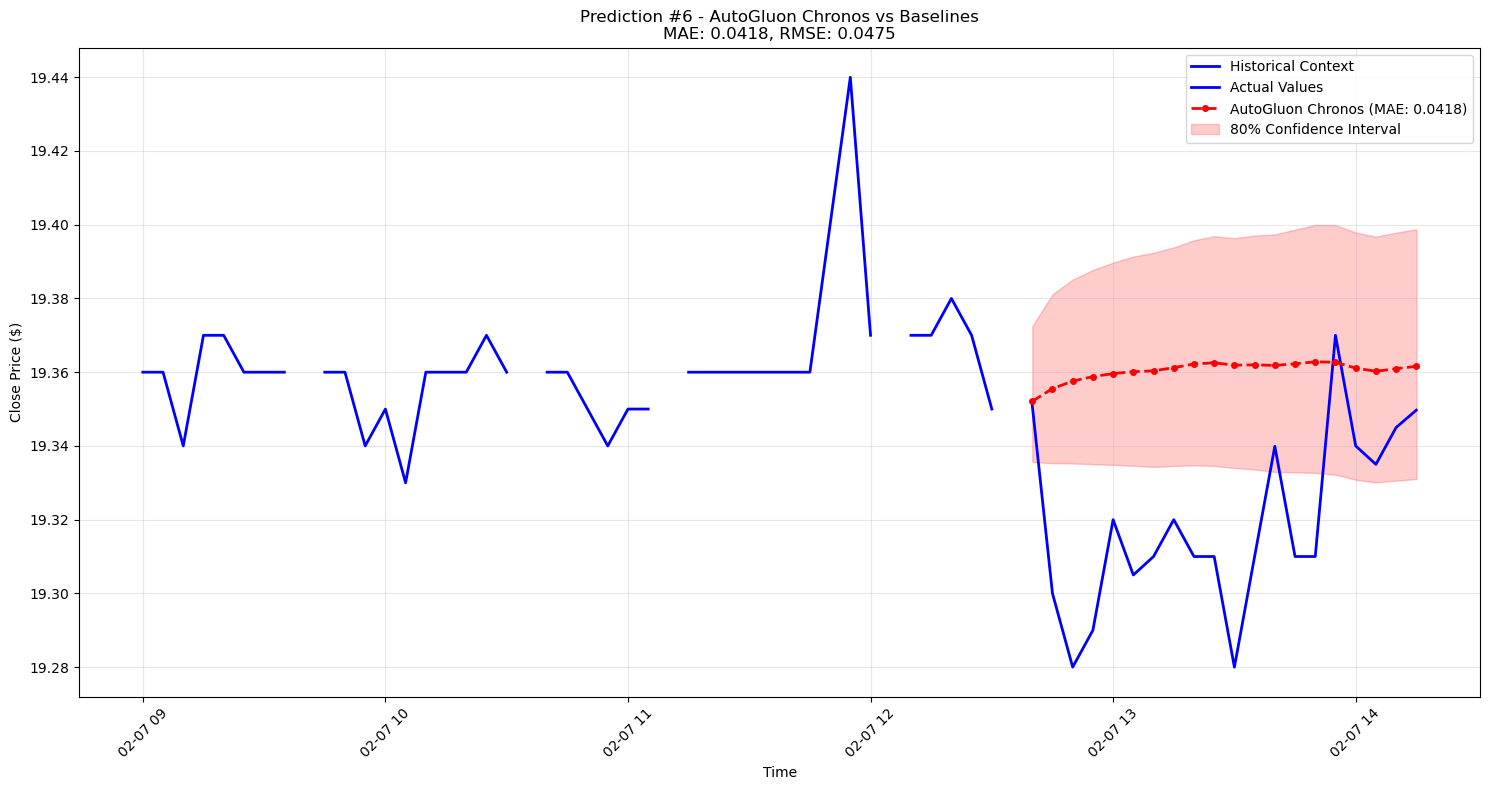

 ✅ AutoGluon - MAE: 0.0418, RMSE: 0.0475
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_6.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_6.csv

🔍 Making prediction #7 for window ending at 5216
   Context data: rows 4996 to 5195 (200 rows)
   Test data: rows 5196 to 5215 (20 rows)
   📊 Plotting prediction #7...
   🎯 AutoGluon native plot for prediction #7...
   📊 Plotting prediction #7...
   🎯 AutoGluon native plot for prediction #7...


c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


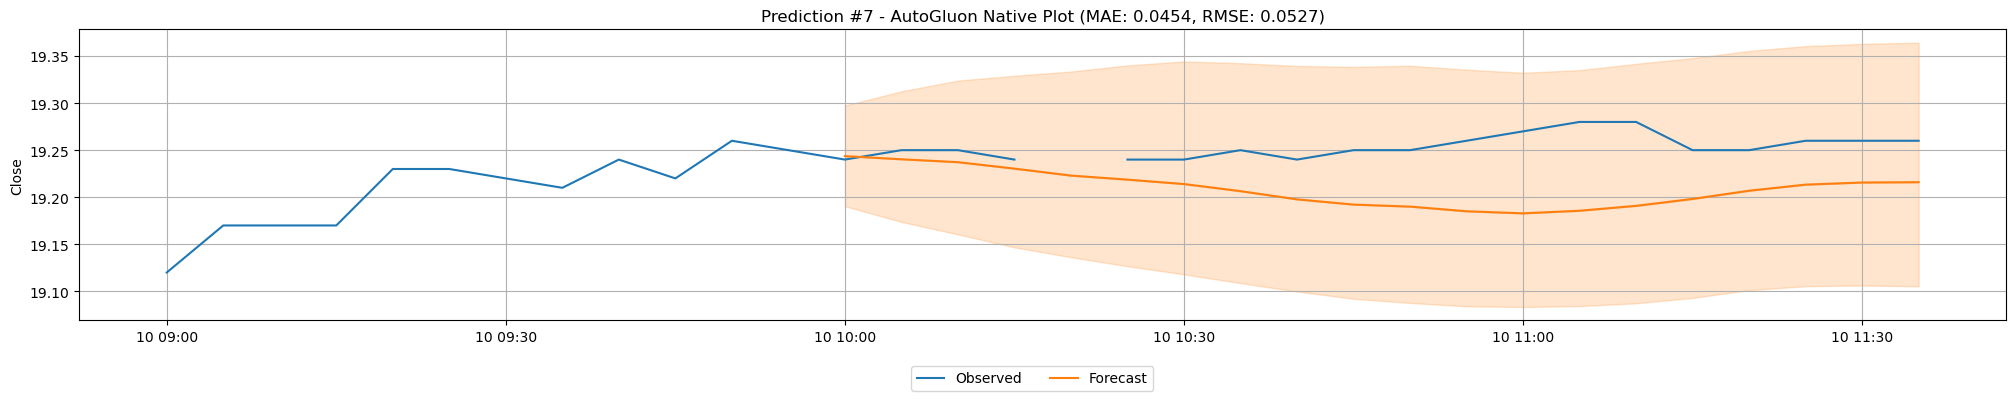

   📊 Custom comparison plot for prediction #7...


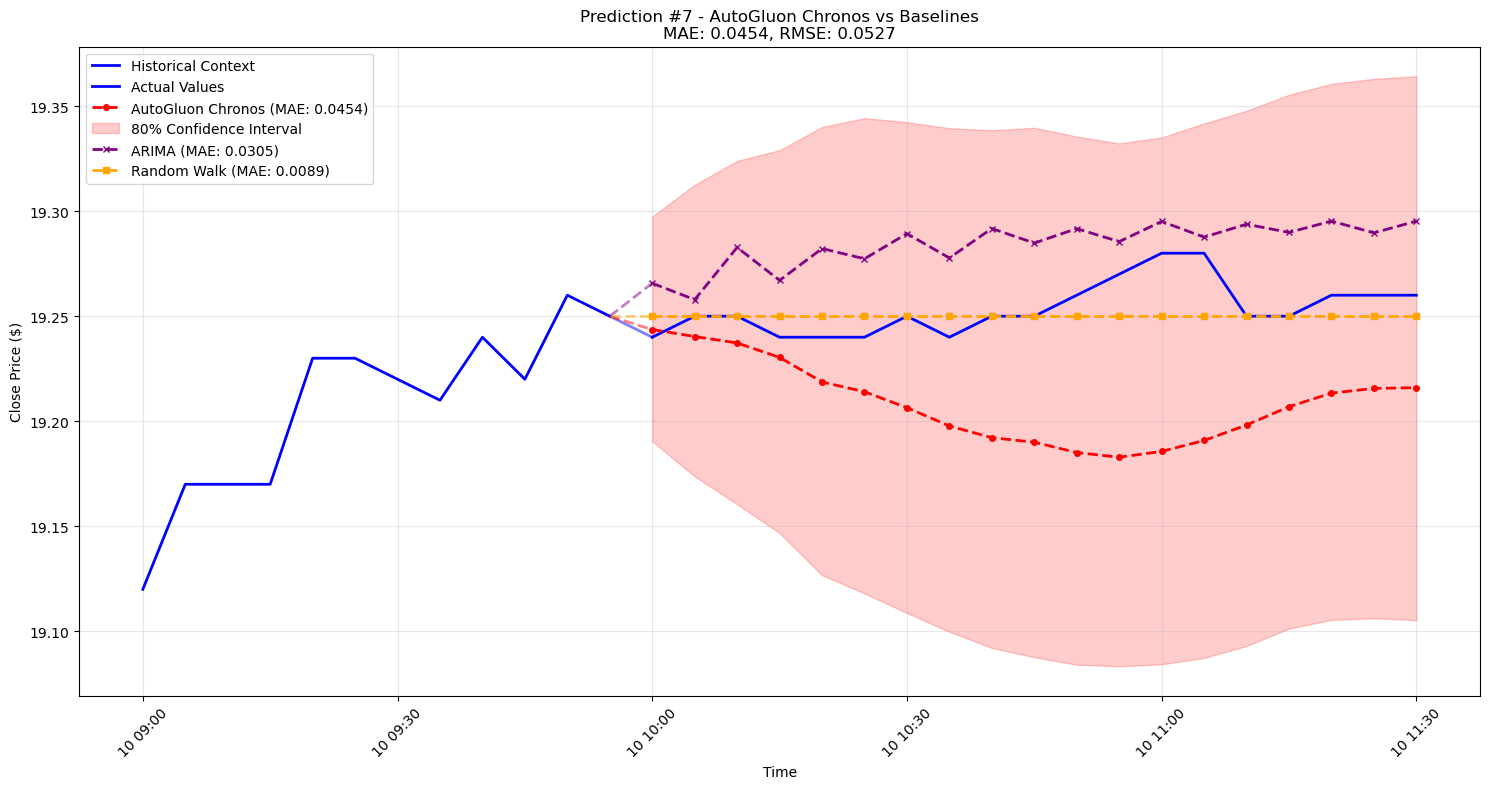

 ✅ AutoGluon - MAE: 0.0454, RMSE: 0.0527
 ✅ ARIMA     - MAE: 0.0305, RMSE: 0.0325
 ✅ Random W. - MAE: 0.0089, RMSE: 0.0128
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_7.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_7.csv

🔍 Making prediction #8 for window ending at 6049
   Context data: rows 5829 to 6028 (200 rows)
   Test data: rows 6029 to 6048 (20 rows)
   ⚠️ Error generating baseline forecasts: Input contains NaN.
   📊 Plotting prediction #8...
   🎯 AutoGluon native plot for prediction #8...
   ⚠️ Error generating baseline forecasts: Input contains NaN.
   📊 Plotting prediction #8...
   🎯 AutoGluon native plot for prediction #8...


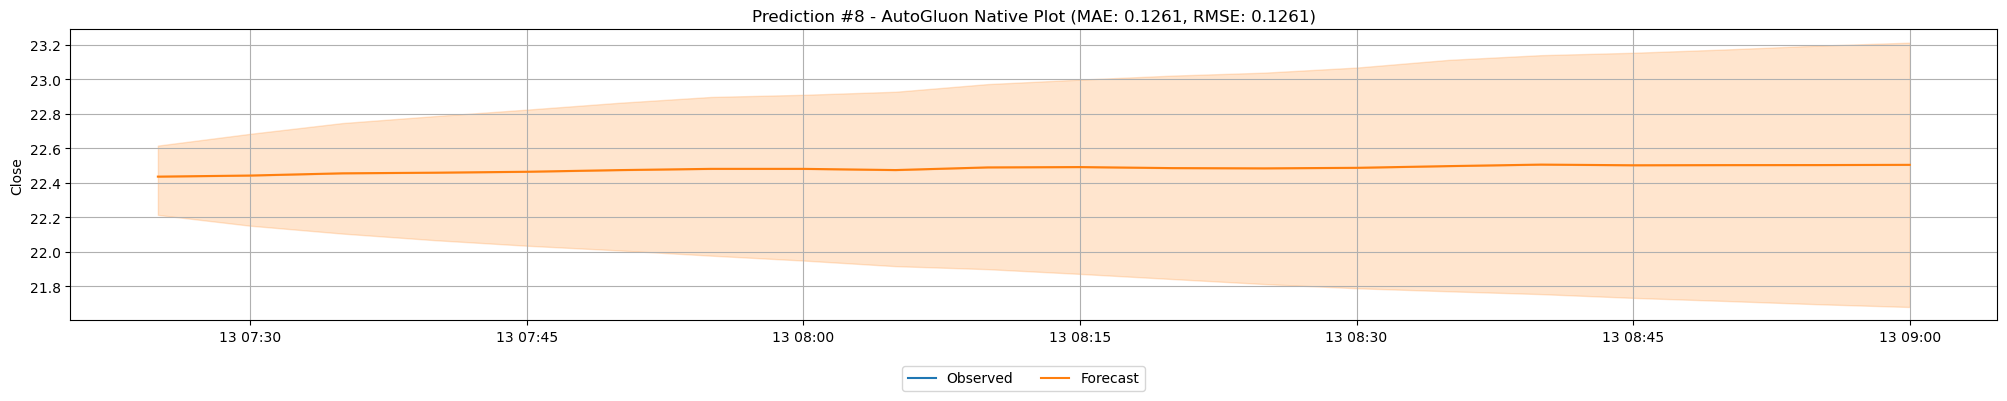

   📊 Custom comparison plot for prediction #8...


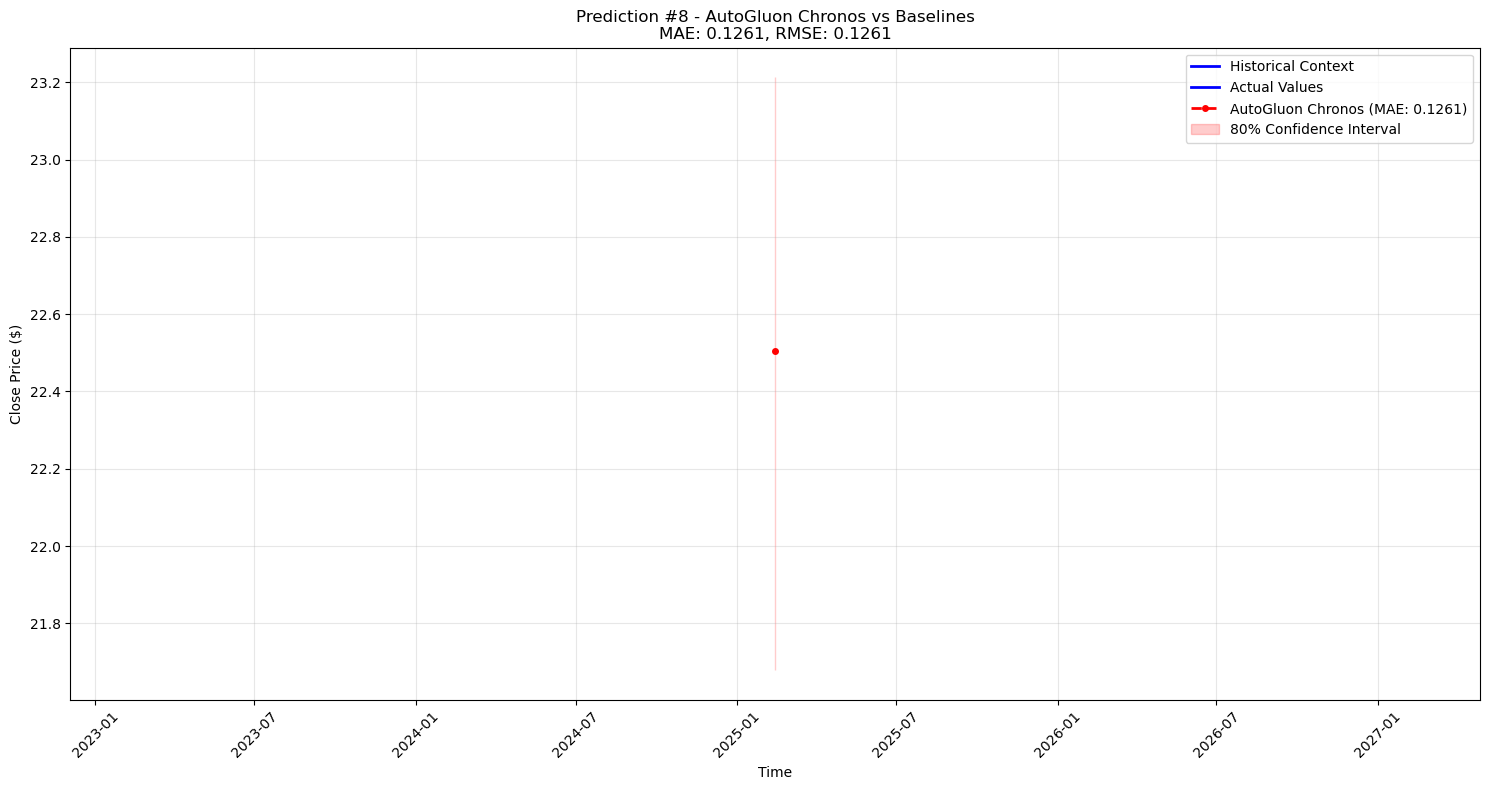

 ✅ AutoGluon - MAE: 0.1261, RMSE: 0.1261
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_8.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_8.csv

🔍 Making prediction #9 for window ending at 6882
   Context data: rows 6662 to 6861 (200 rows)
   Test data: rows 6862 to 6881 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping metrics.

🔍 Making prediction #10 for window ending at 7715
   Context data: rows 7495 to 7694 (200 rows)
   Test data: rows 7695 to 7714 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping metrics.

🔍 Making prediction #10 for window ending at 7715
   Context data: rows 7495 to 7694 (200 rows)
   Test data: rows 7695 to 7714 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping metrics.

🔍 Making prediction #11 for window ending at 8548
   Context data: rows 8328 to 8527 (200

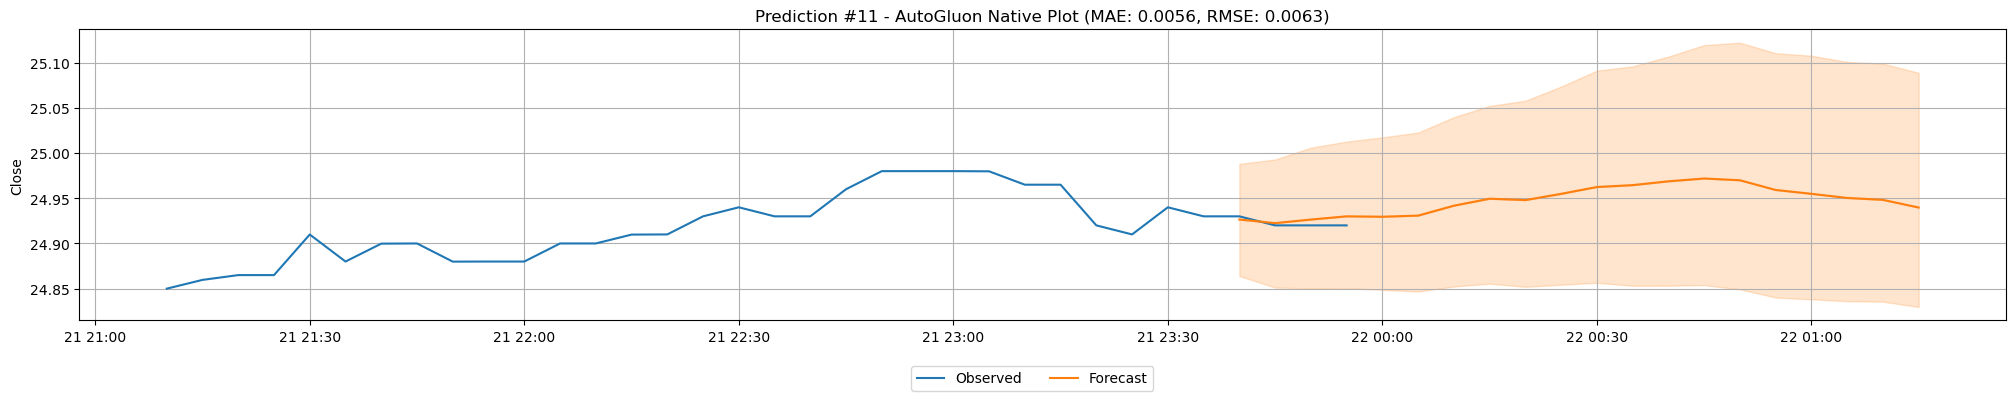

   📊 Custom comparison plot for prediction #11...


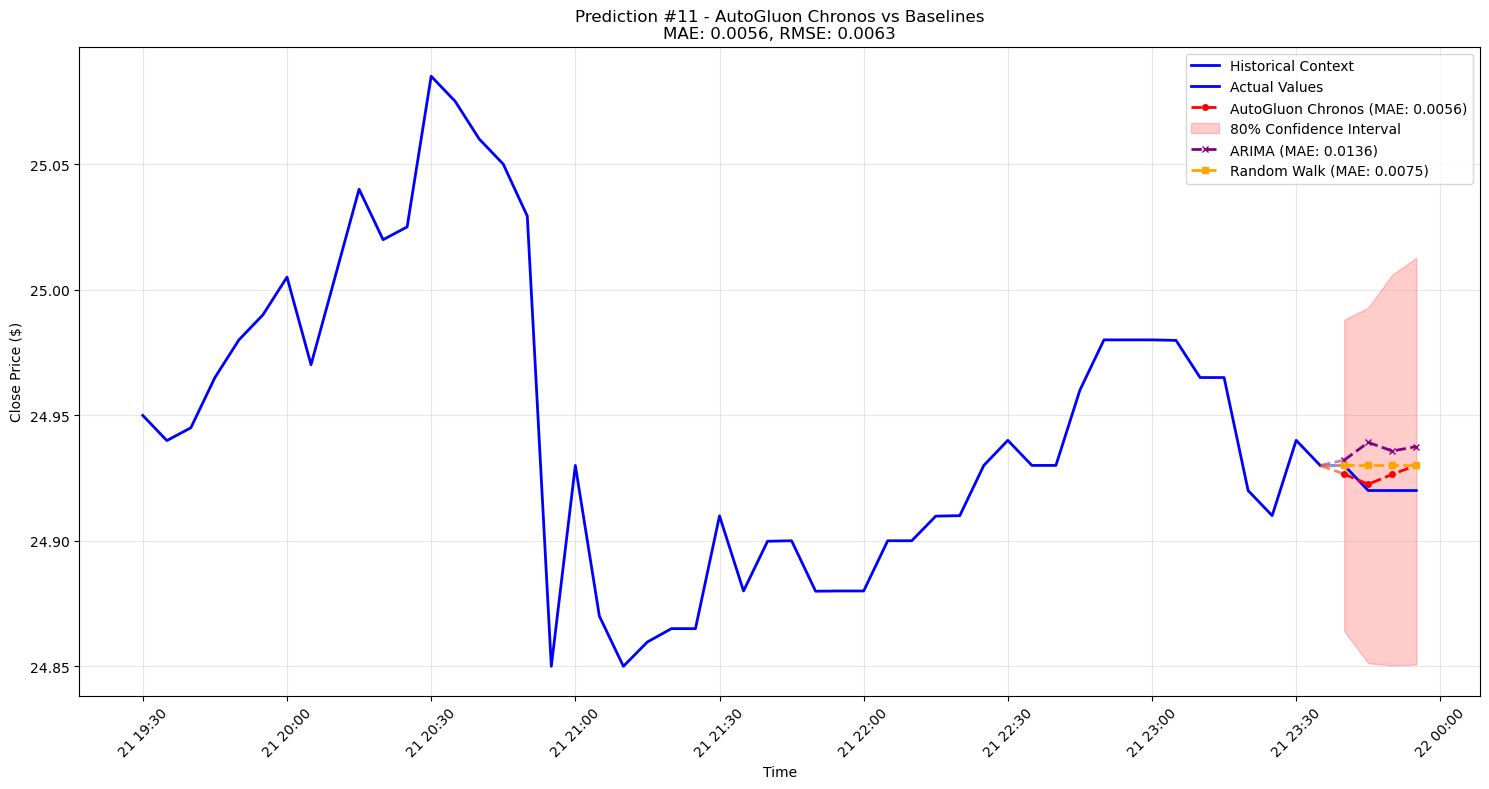

 ✅ AutoGluon - MAE: 0.0056, RMSE: 0.0063
 ✅ ARIMA     - MAE: 0.0136, RMSE: 0.0152
 ✅ Random W. - MAE: 0.0075, RMSE: 0.0087
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_11.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_11.csv

🔍 Making prediction #12 for window ending at 9381
   Context data: rows 9161 to 9360 (200 rows)
   Test data: rows 9361 to 9380 (20 rows)
   📊 Plotting prediction #12...
   🎯 AutoGluon native plot for prediction #12...
   📊 Plotting prediction #12...
   🎯 AutoGluon native plot for prediction #12...


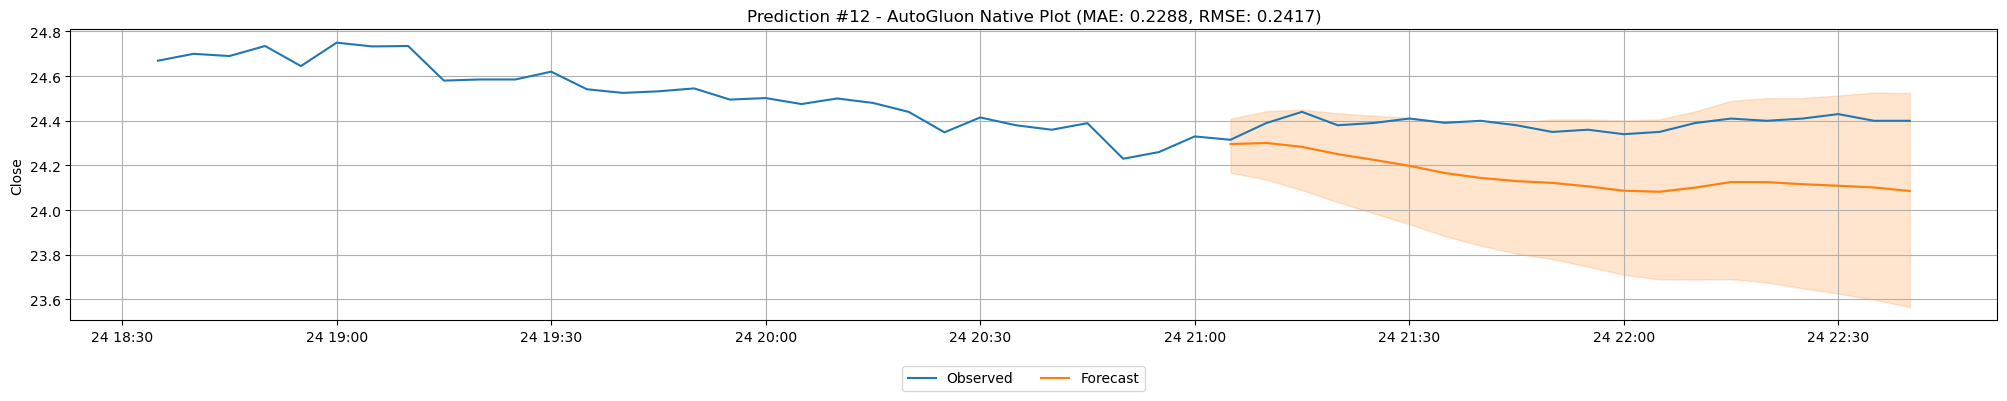

   📊 Custom comparison plot for prediction #12...


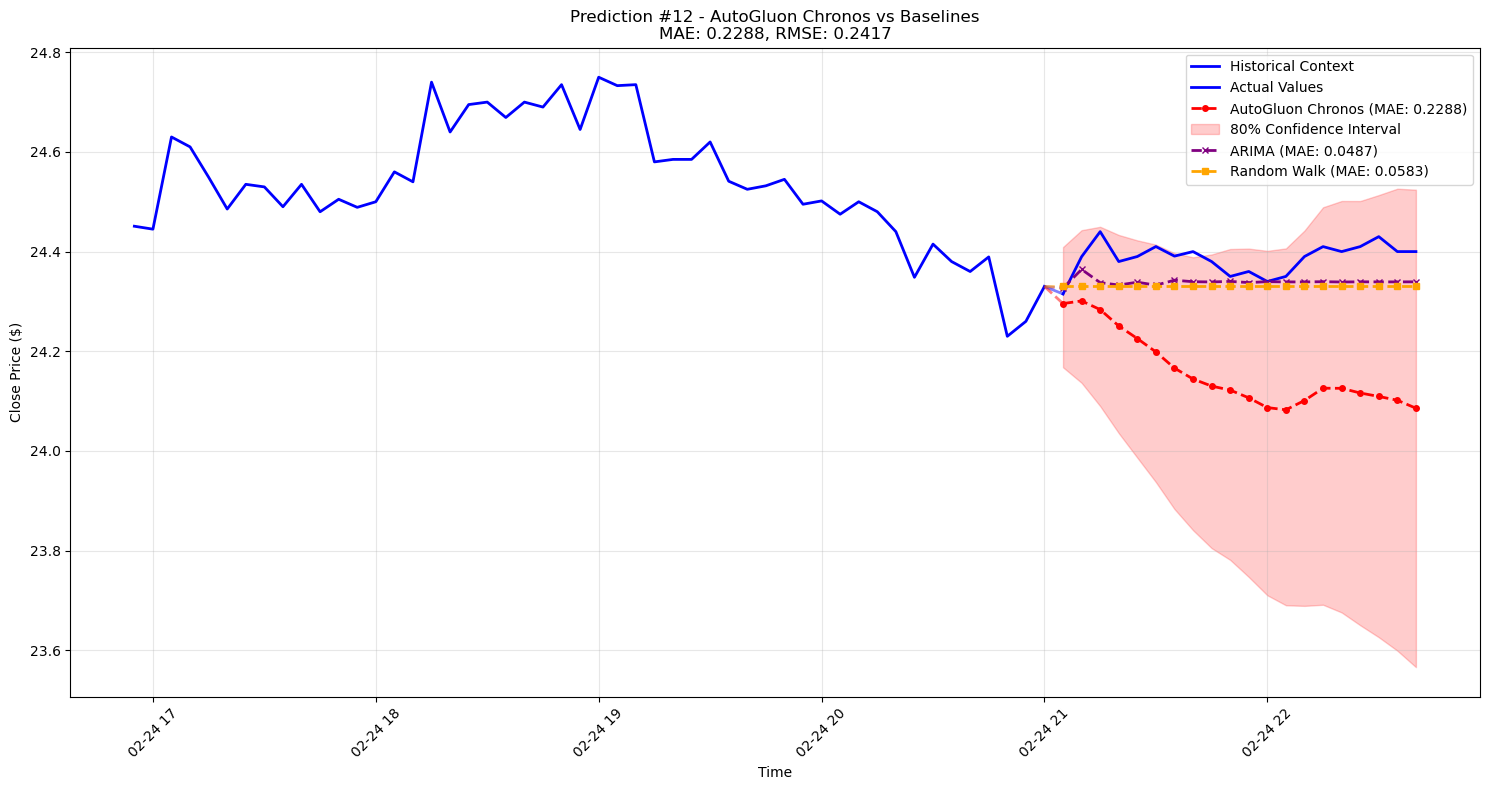

 ✅ AutoGluon - MAE: 0.2288, RMSE: 0.2417
 ✅ ARIMA     - MAE: 0.0487, RMSE: 0.0559
 ✅ Random W. - MAE: 0.0583, RMSE: 0.0642
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_12.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_12.csv

🔍 Making prediction #13 for window ending at 10213
   Context data: rows 9993 to 10192 (200 rows)
   Test data: rows 10193 to 10212 (20 rows)
   📊 Plotting prediction #13...
   🎯 AutoGluon native plot for prediction #13...
   📊 Plotting prediction #13...
   🎯 AutoGluon native plot for prediction #13...


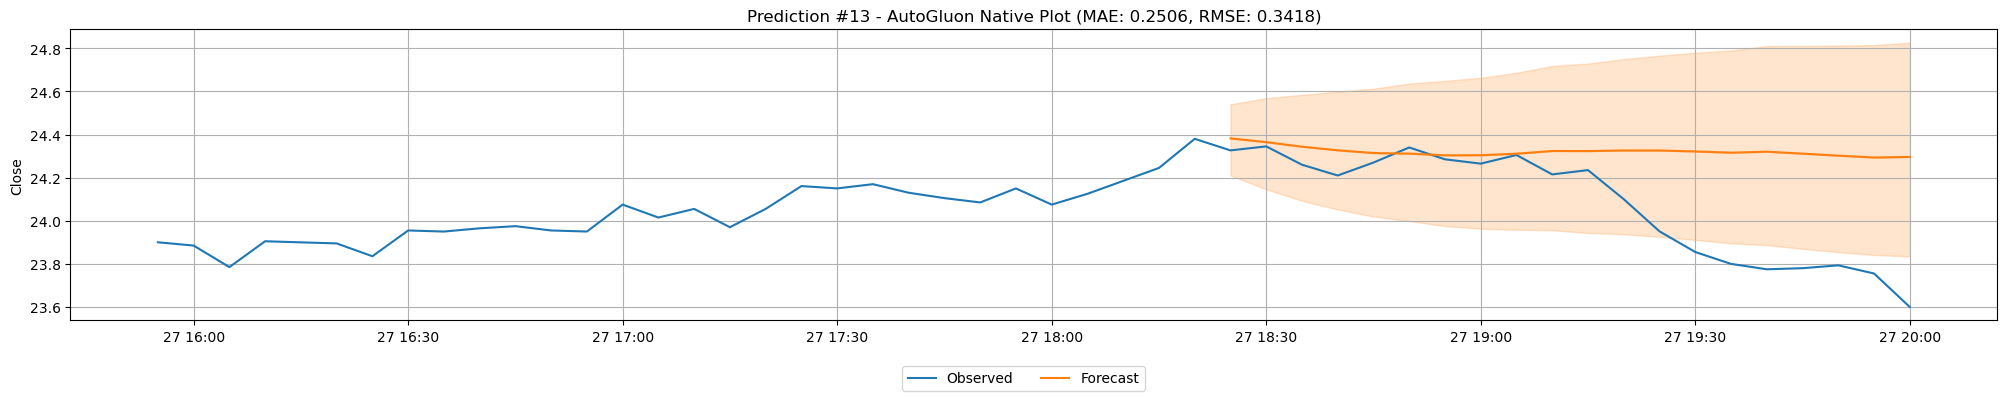

   📊 Custom comparison plot for prediction #13...


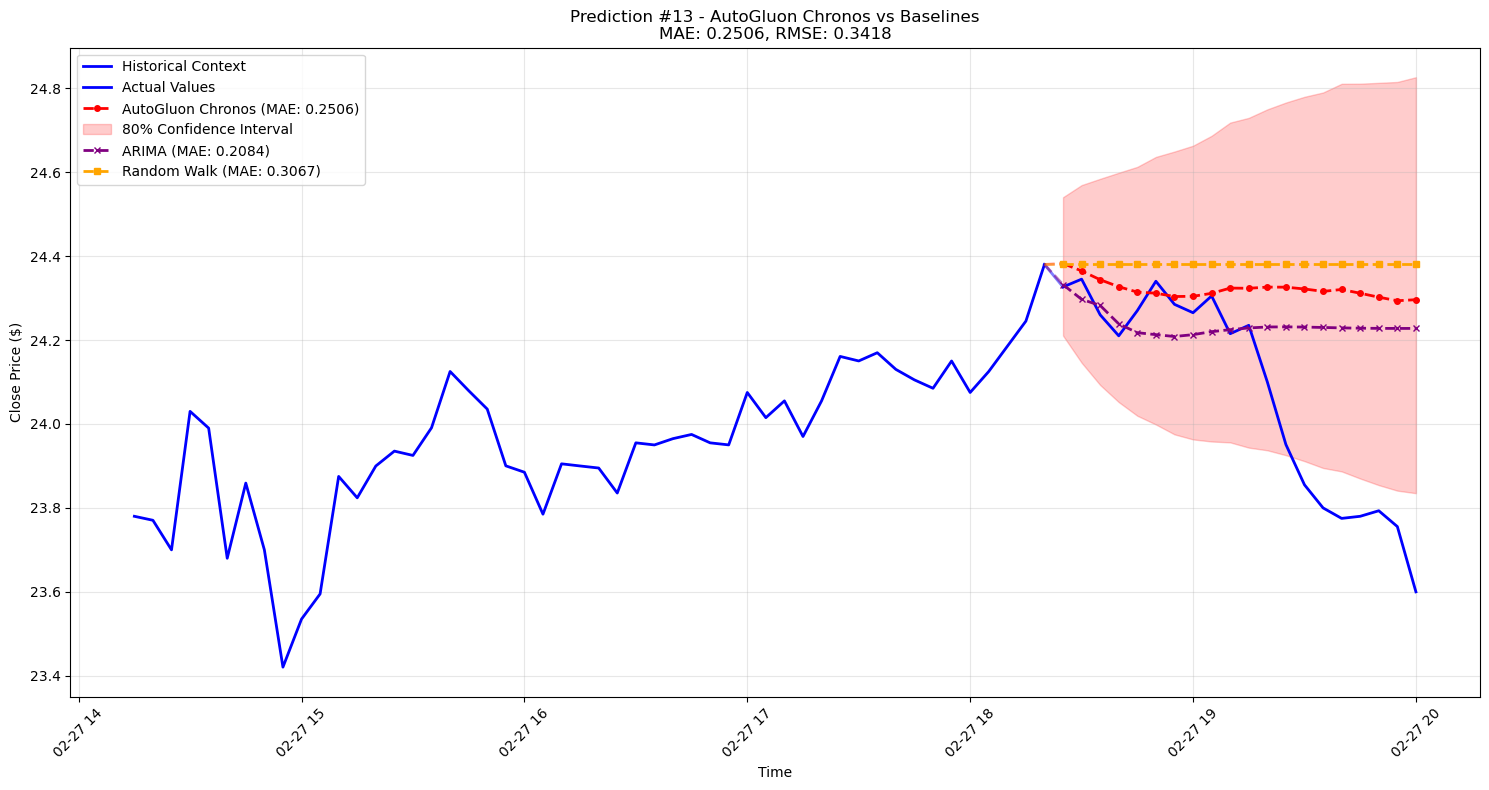

 ✅ AutoGluon - MAE: 0.2506, RMSE: 0.3418
 ✅ ARIMA     - MAE: 0.2084, RMSE: 0.2892
 ✅ Random W. - MAE: 0.3067, RMSE: 0.3925
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_13.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_13.csv

🔍 Making prediction #14 for window ending at 11046
   Context data: rows 10826 to 11025 (200 rows)
   Test data: rows 11026 to 11045 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping metrics.

🔍 Making prediction #15 for window ending at 11879
   Context data: rows 11659 to 11858 (200 rows)
   Test data: rows 11859 to 11878 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping metrics.

🔍 Making prediction #15 for window ending at 11879
   Context data: rows 11659 to 11858 (200 rows)
   Test data: rows 11859 to 11878 (20 rows)
   📊 Plotting prediction #15...
   🎯 AutoGluon native plot fo

c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


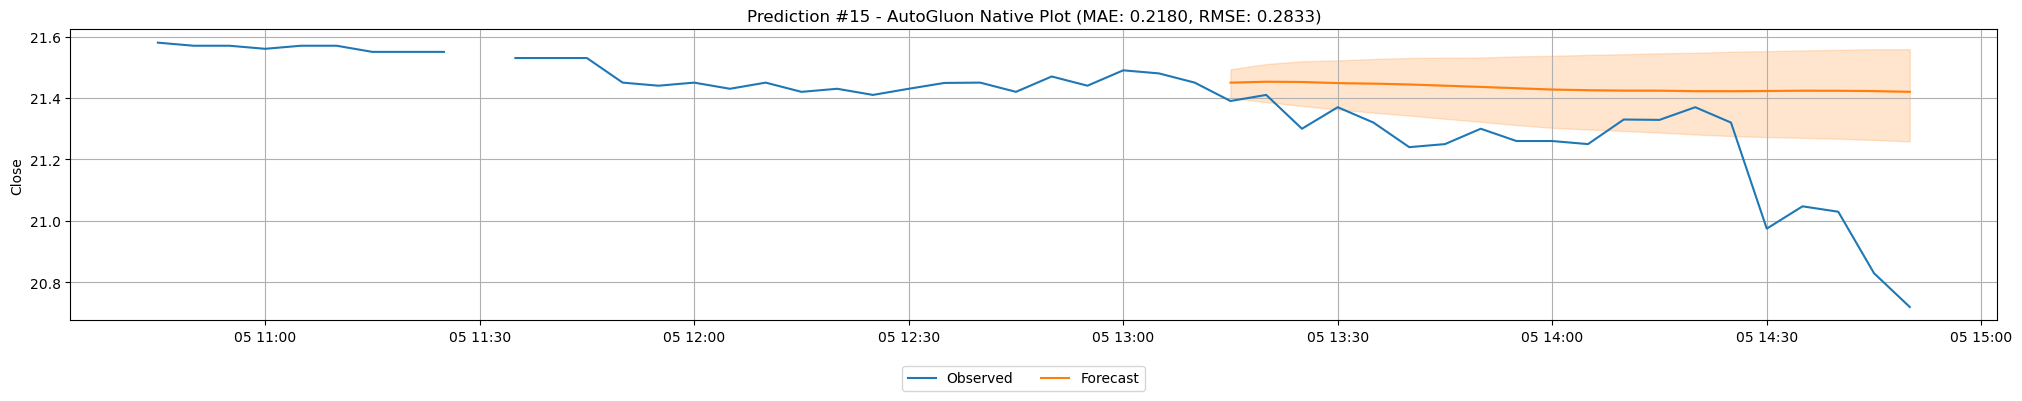

   📊 Custom comparison plot for prediction #15...


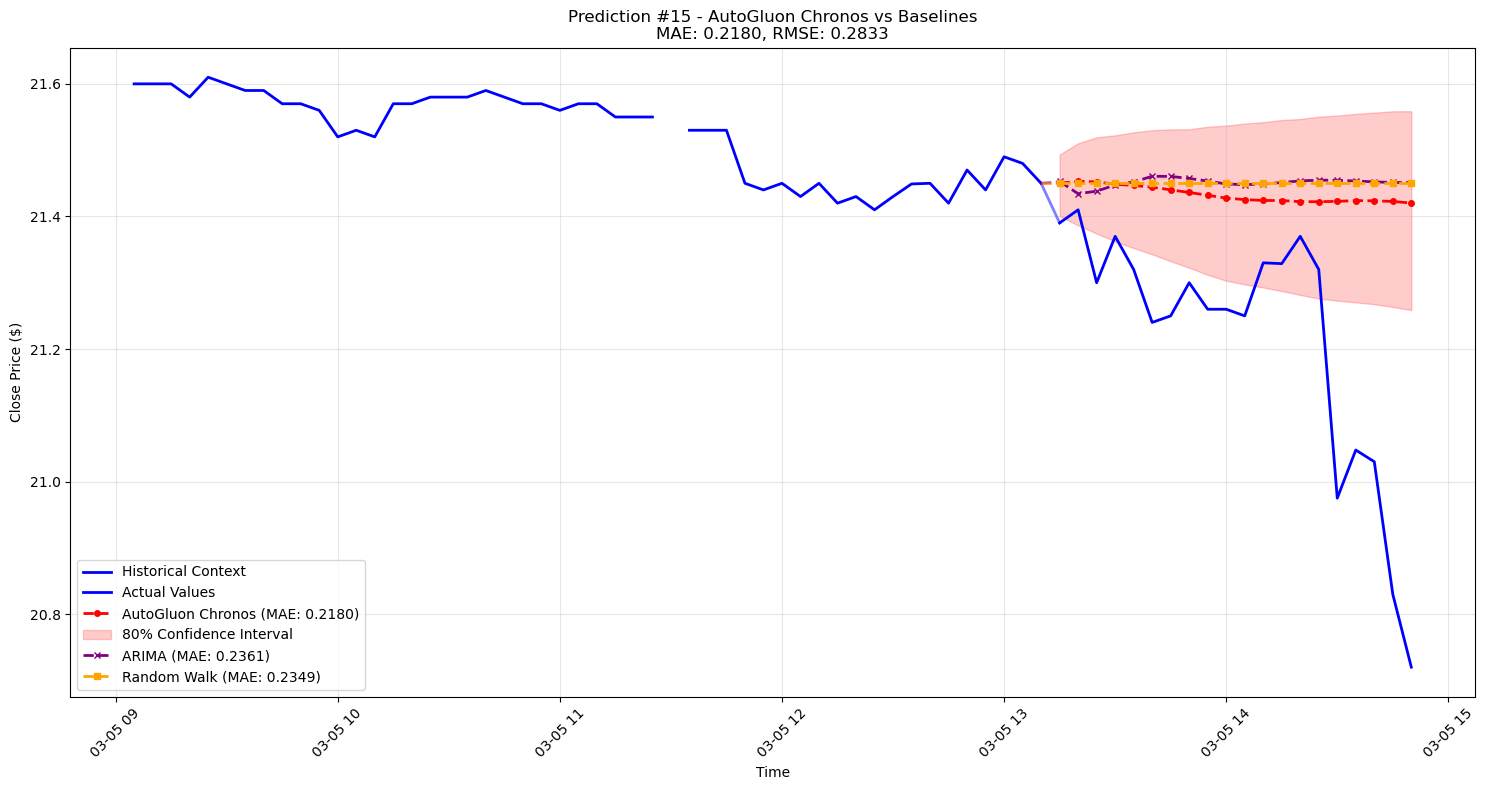

 ✅ AutoGluon - MAE: 0.2180, RMSE: 0.2833
 ✅ ARIMA     - MAE: 0.2361, RMSE: 0.3020
 ✅ Random W. - MAE: 0.2349, RMSE: 0.3003
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_15.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_15.csv

🔍 Making prediction #16 for window ending at 12712
   Context data: rows 12492 to 12691 (200 rows)
   Test data: rows 12692 to 12711 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping metrics.

🔍 Making prediction #17 for window ending at 13545
   Context data: rows 13325 to 13524 (200 rows)
   Test data: rows 13525 to 13544 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping metrics.

🔍 Making prediction #17 for window ending at 13545
   Context data: rows 13325 to 13524 (200 rows)
   Test data: rows 13525 to 13544 (20 rows)
   📊 Plotting prediction #17...
   🎯 AutoGluon native plot fo

c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


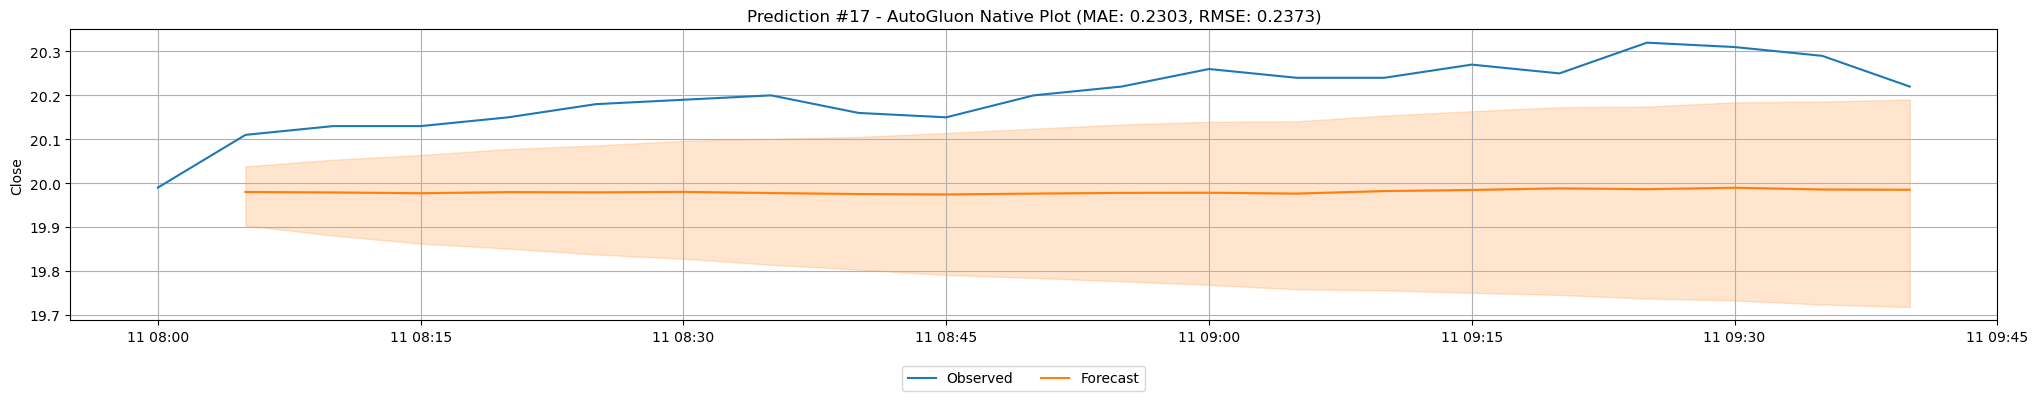

   📊 Custom comparison plot for prediction #17...


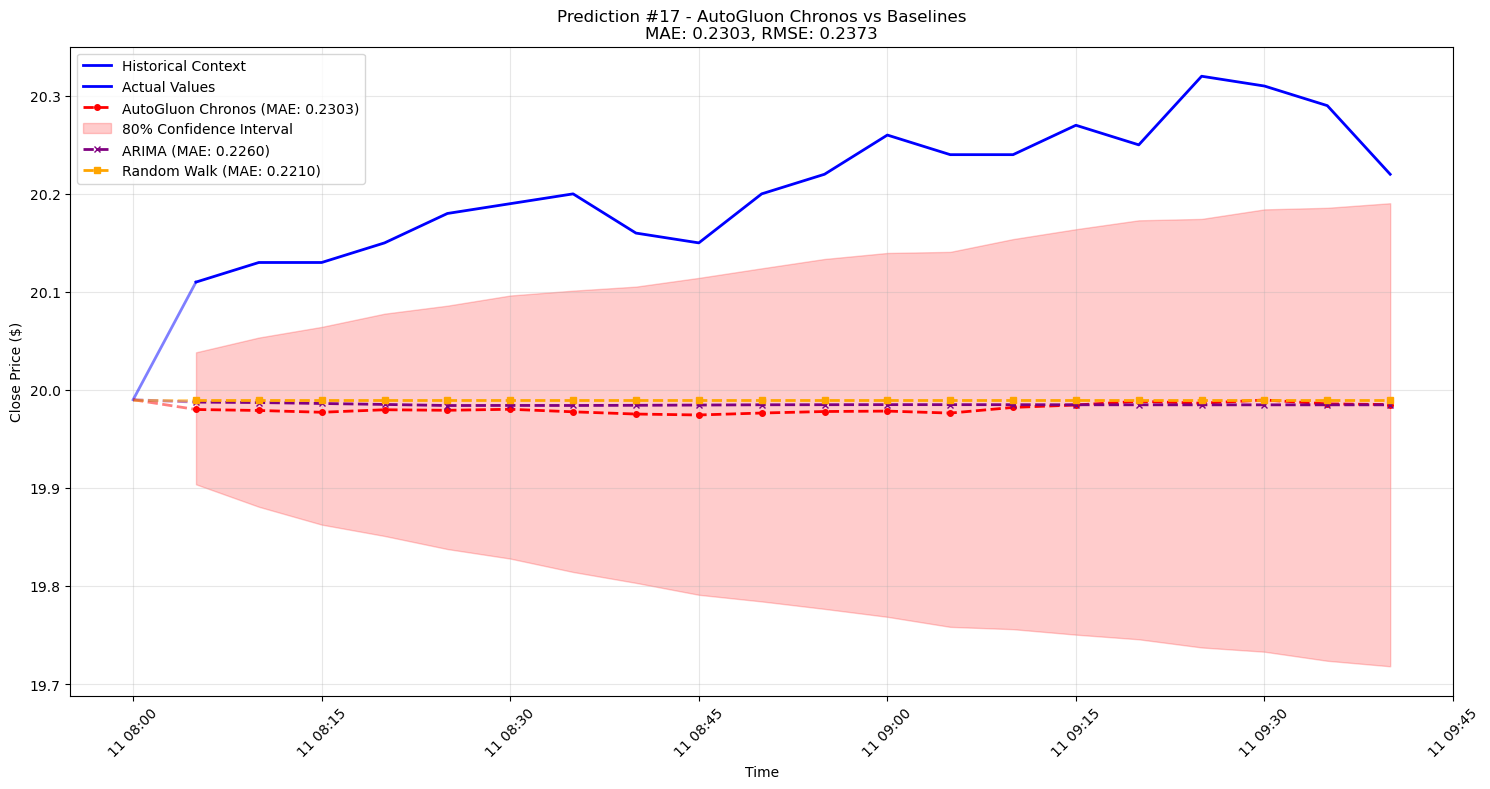

 ✅ AutoGluon - MAE: 0.2303, RMSE: 0.2373
 ✅ ARIMA     - MAE: 0.2260, RMSE: 0.2339
 ✅ Random W. - MAE: 0.2210, RMSE: 0.2290
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_17.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_17.csv

🔍 Making prediction #18 for window ending at 14378
   Context data: rows 14158 to 14357 (200 rows)
   Test data: rows 14358 to 14377 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping metrics.

🔍 Making prediction #19 for window ending at 15210
   Context data: rows 14990 to 15189 (200 rows)
   Test data: rows 15190 to 15209 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping metrics.

🔍 Making prediction #19 for window ending at 15210
   Context data: rows 14990 to 15189 (200 rows)
   Test data: rows 15190 to 15209 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping

c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


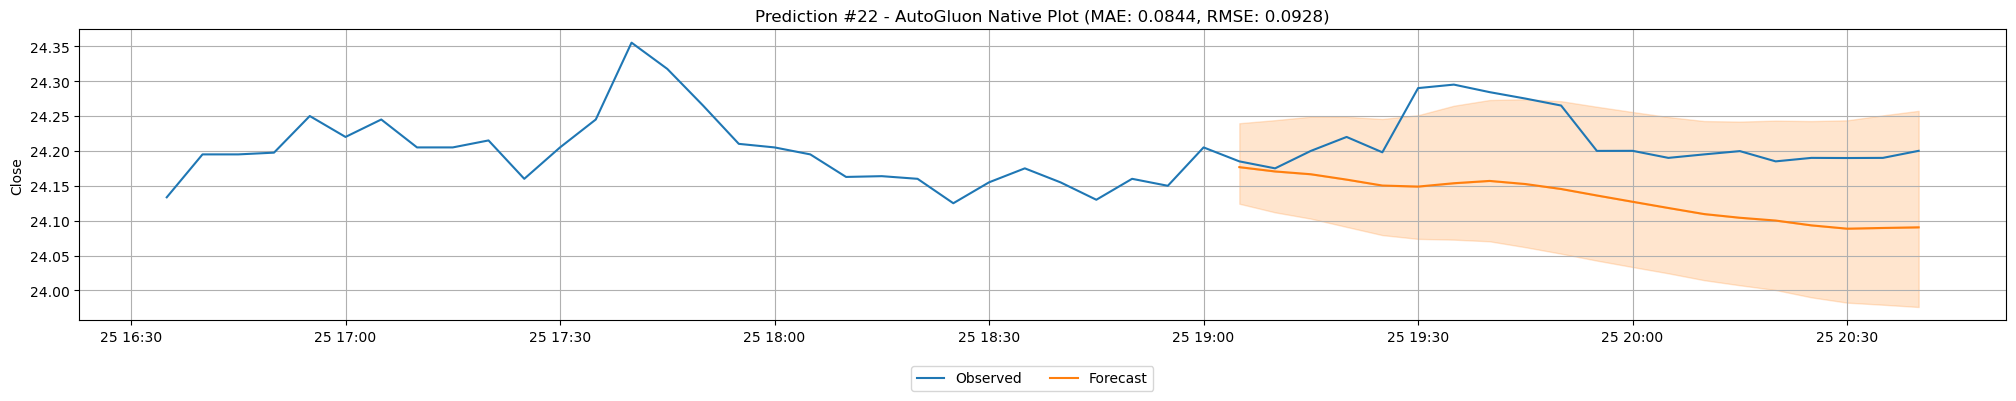

   📊 Custom comparison plot for prediction #22...


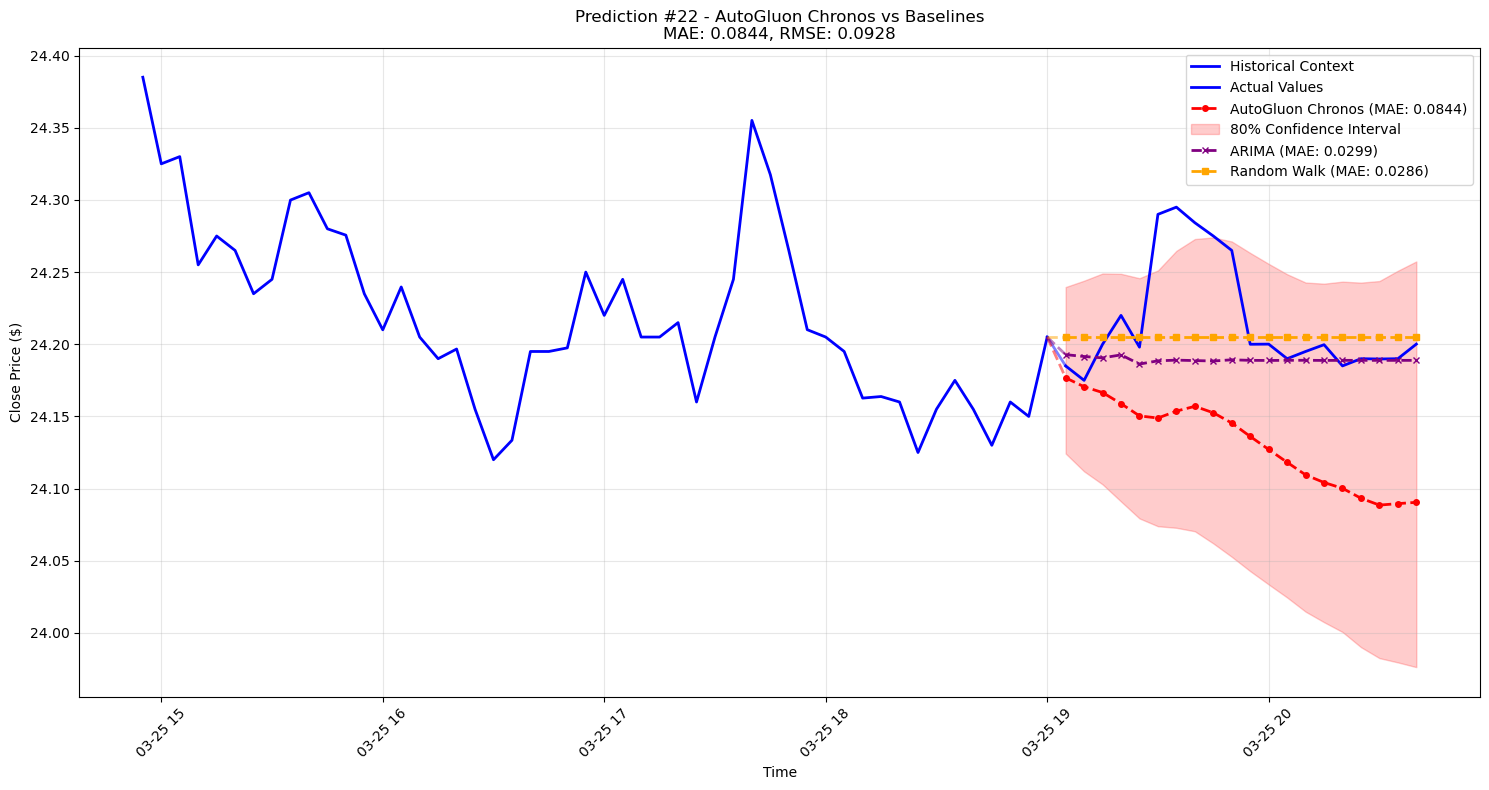

 ✅ AutoGluon - MAE: 0.0844, RMSE: 0.0928
 ✅ ARIMA     - MAE: 0.0299, RMSE: 0.0478
 ✅ Random W. - MAE: 0.0286, RMSE: 0.0407
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_22.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_22.csv

🔍 Making prediction #23 for window ending at 18542
   Context data: rows 18322 to 18521 (200 rows)
   Test data: rows 18522 to 18541 (20 rows)
   📊 Plotting prediction #23...
   🎯 AutoGluon native plot for prediction #23...
   📊 Plotting prediction #23...
   🎯 AutoGluon native plot for prediction #23...


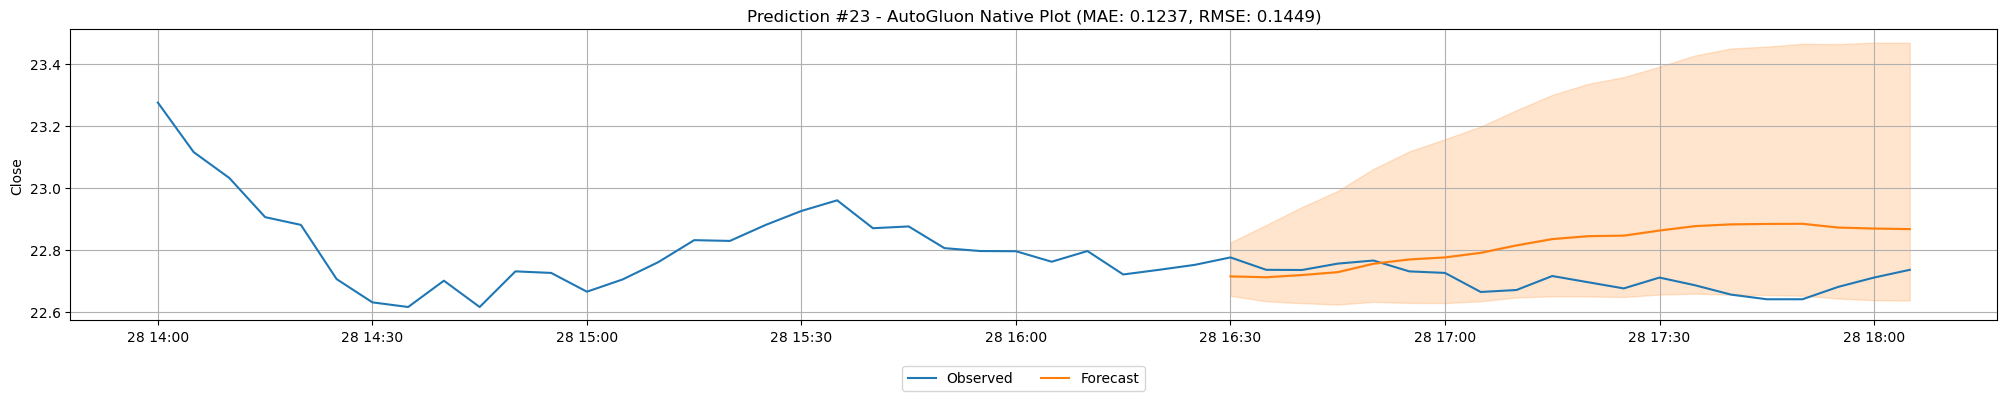

   📊 Custom comparison plot for prediction #23...


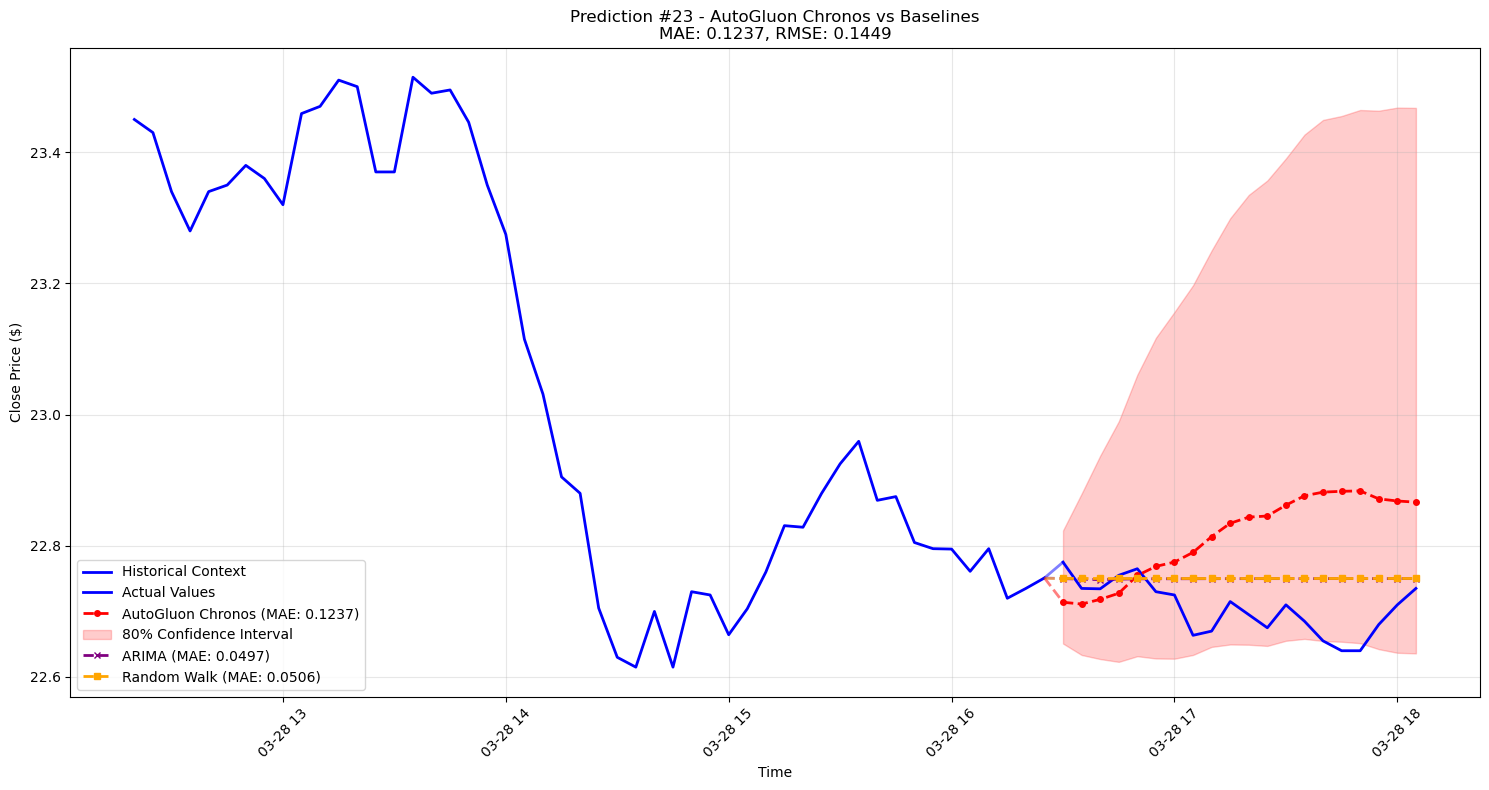

 ✅ AutoGluon - MAE: 0.1237, RMSE: 0.1449
 ✅ ARIMA     - MAE: 0.0497, RMSE: 0.0599
 ✅ Random W. - MAE: 0.0506, RMSE: 0.0607
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_23.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_23.csv

🔍 Making prediction #24 for window ending at 19375
   Context data: rows 19155 to 19354 (200 rows)
   Test data: rows 19355 to 19374 (20 rows)
   📊 Plotting prediction #24...
   🎯 AutoGluon native plot for prediction #24...
   📊 Plotting prediction #24...
   🎯 AutoGluon native plot for prediction #24...


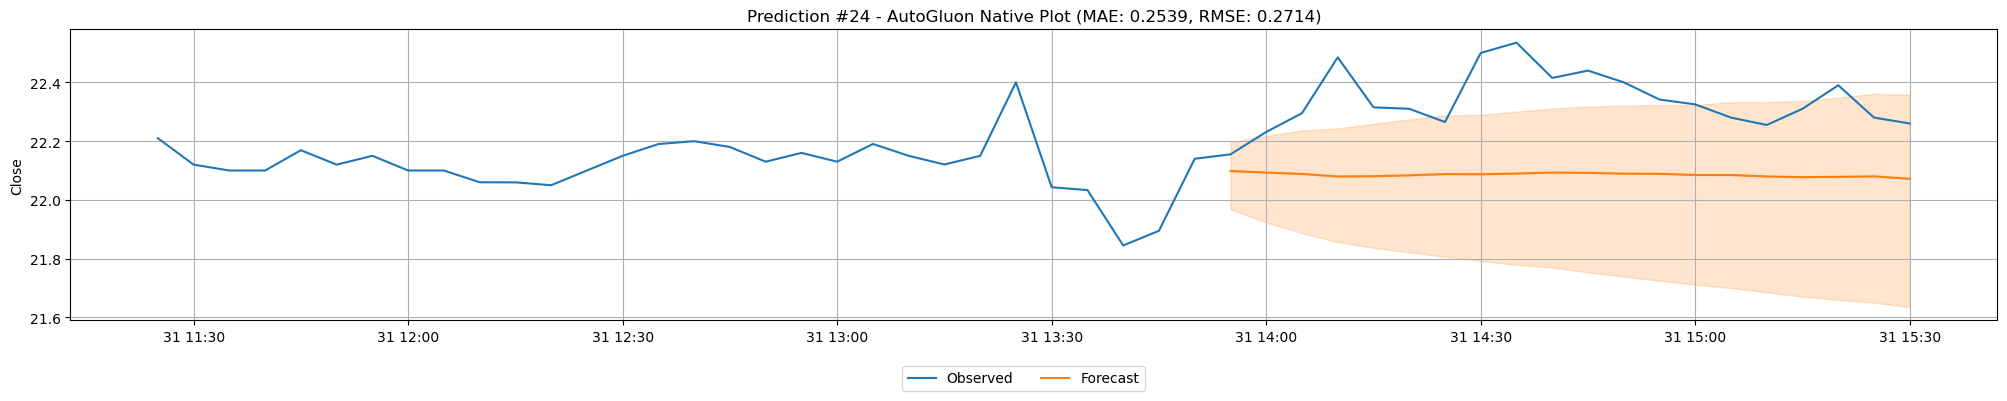

   📊 Custom comparison plot for prediction #24...


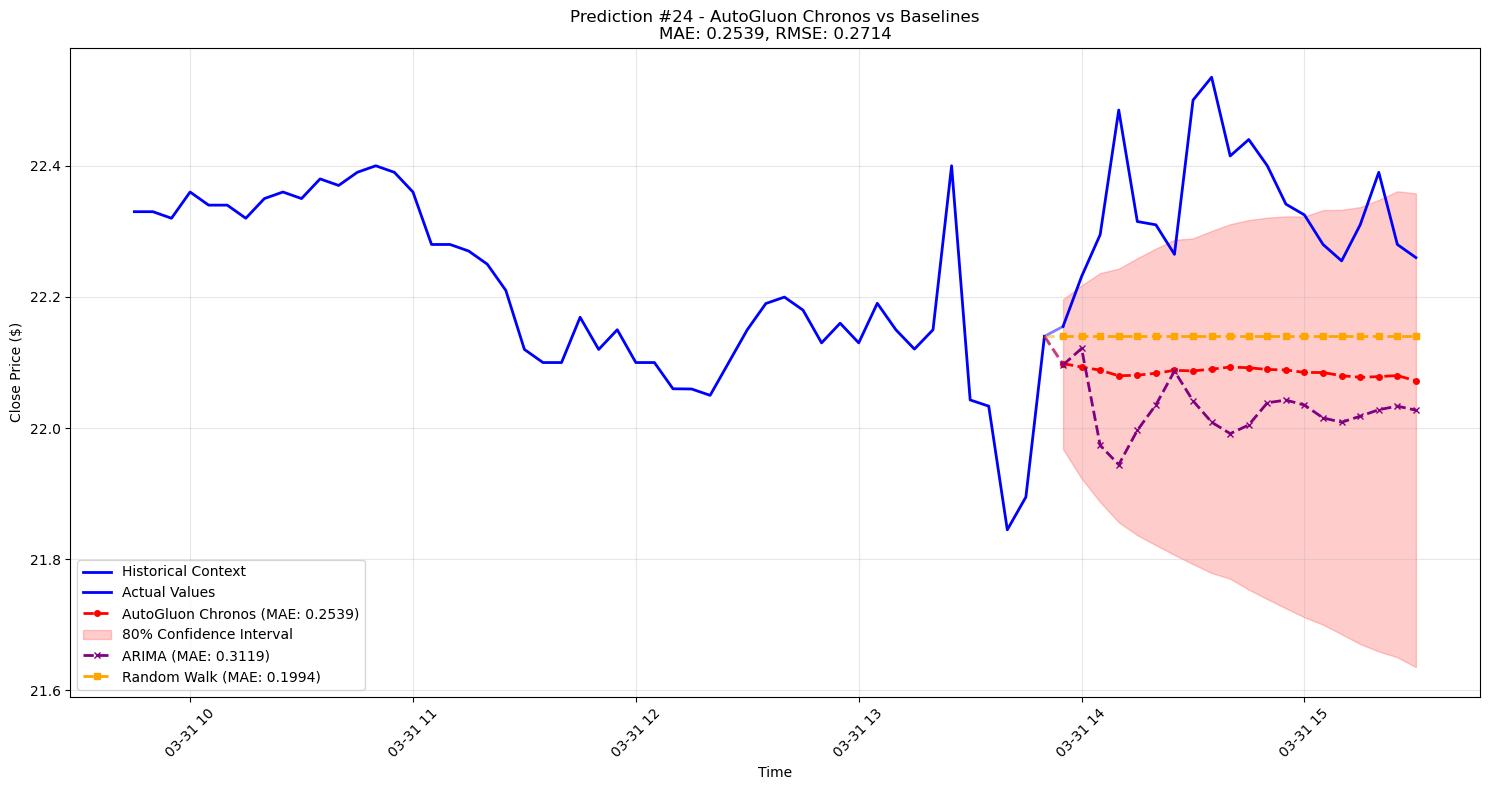

 ✅ AutoGluon - MAE: 0.2539, RMSE: 0.2714
 ✅ ARIMA     - MAE: 0.3119, RMSE: 0.3347
 ✅ Random W. - MAE: 0.1994, RMSE: 0.2212
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_24.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_24.csv

🔍 Making prediction #25 for window ending at 20207
   Context data: rows 19987 to 20186 (200 rows)
   Test data: rows 20187 to 20206 (20 rows)
   📊 Plotting prediction #25...
   🎯 AutoGluon native plot for prediction #25...
   📊 Plotting prediction #25...
   🎯 AutoGluon native plot for prediction #25...


c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


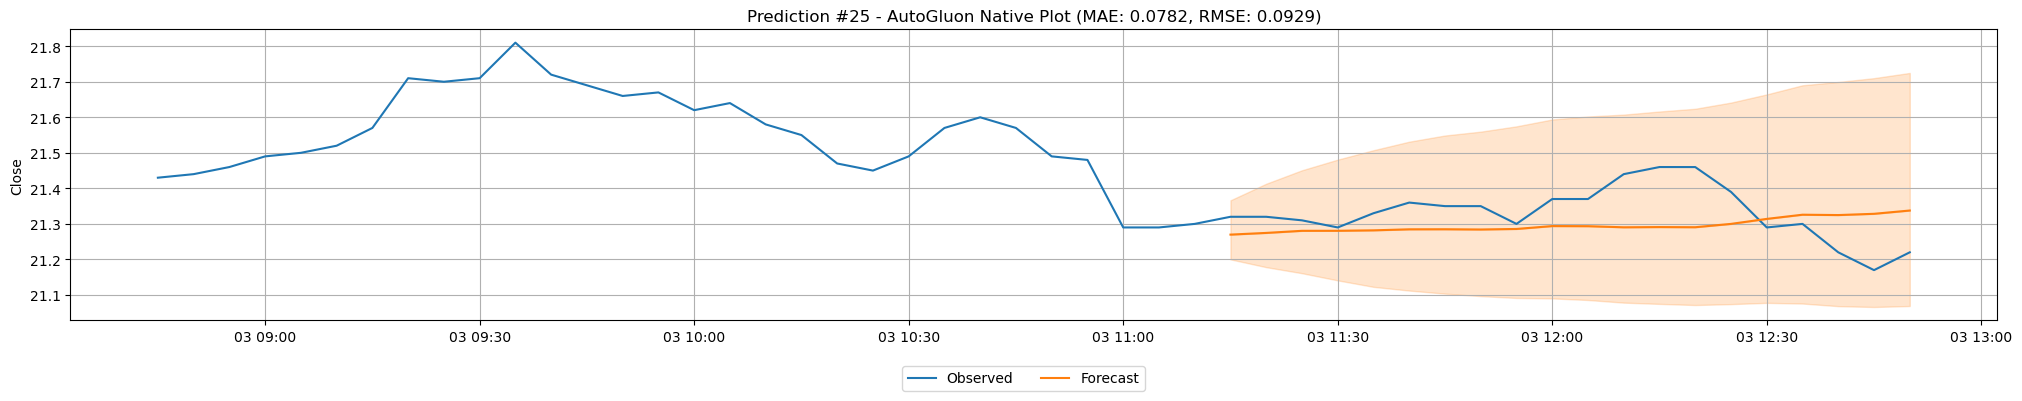

   📊 Custom comparison plot for prediction #25...


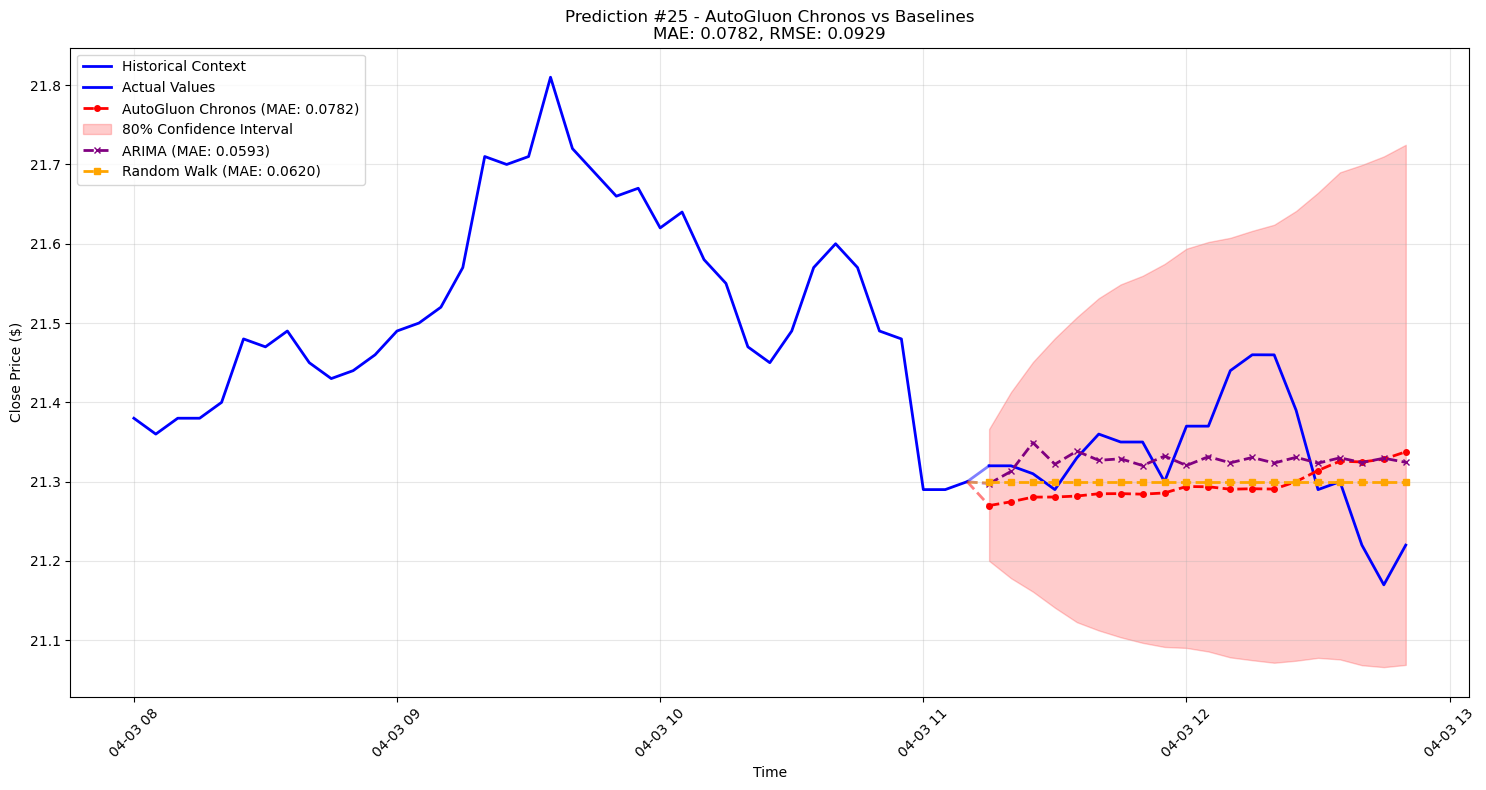

 ✅ AutoGluon - MAE: 0.0782, RMSE: 0.0929
 ✅ ARIMA     - MAE: 0.0593, RMSE: 0.0749
 ✅ Random W. - MAE: 0.0620, RMSE: 0.0803
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_25.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_25.csv

🔍 Making prediction #26 for window ending at 21040
   Context data: rows 20820 to 21019 (200 rows)
   Test data: rows 21020 to 21039 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping metrics.

🔍 Making prediction #27 for window ending at 21873
   Context data: rows 21653 to 21852 (200 rows)
   Test data: rows 21853 to 21872 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping metrics.

🔍 Making prediction #27 for window ending at 21873
   Context data: rows 21653 to 21852 (200 rows)
   Test data: rows 21853 to 21872 (20 rows)
   ⚠️ No actual (non-NaN) values to compare against. Skipping

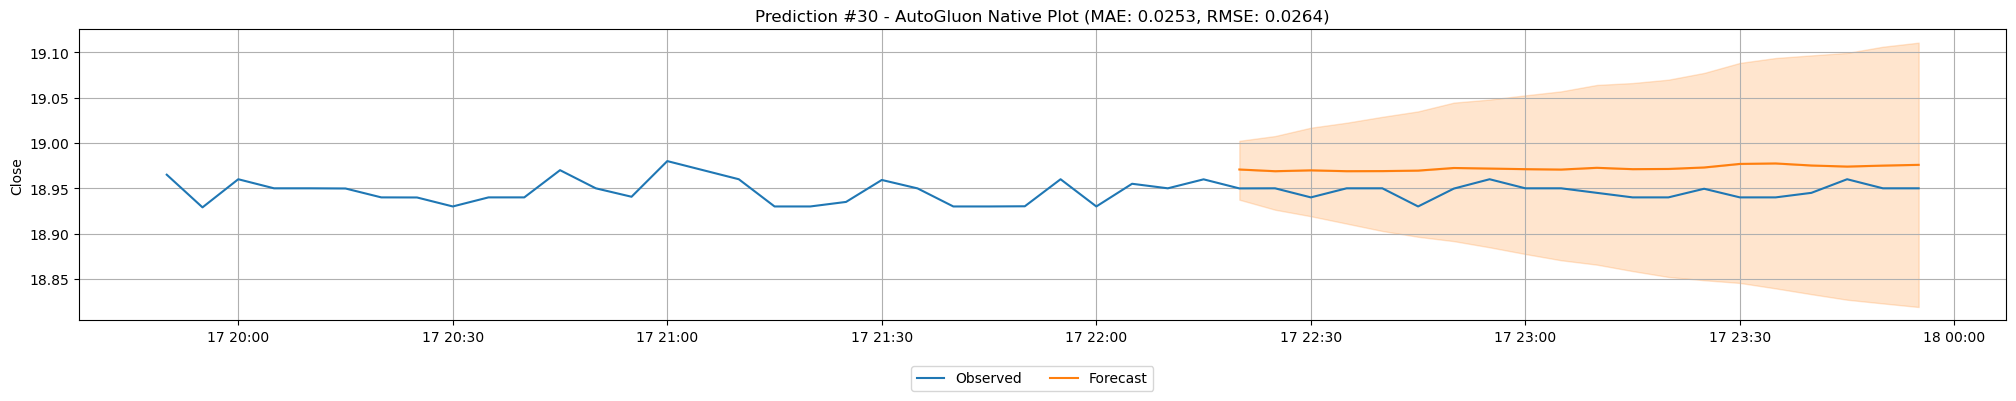

   📊 Custom comparison plot for prediction #30...


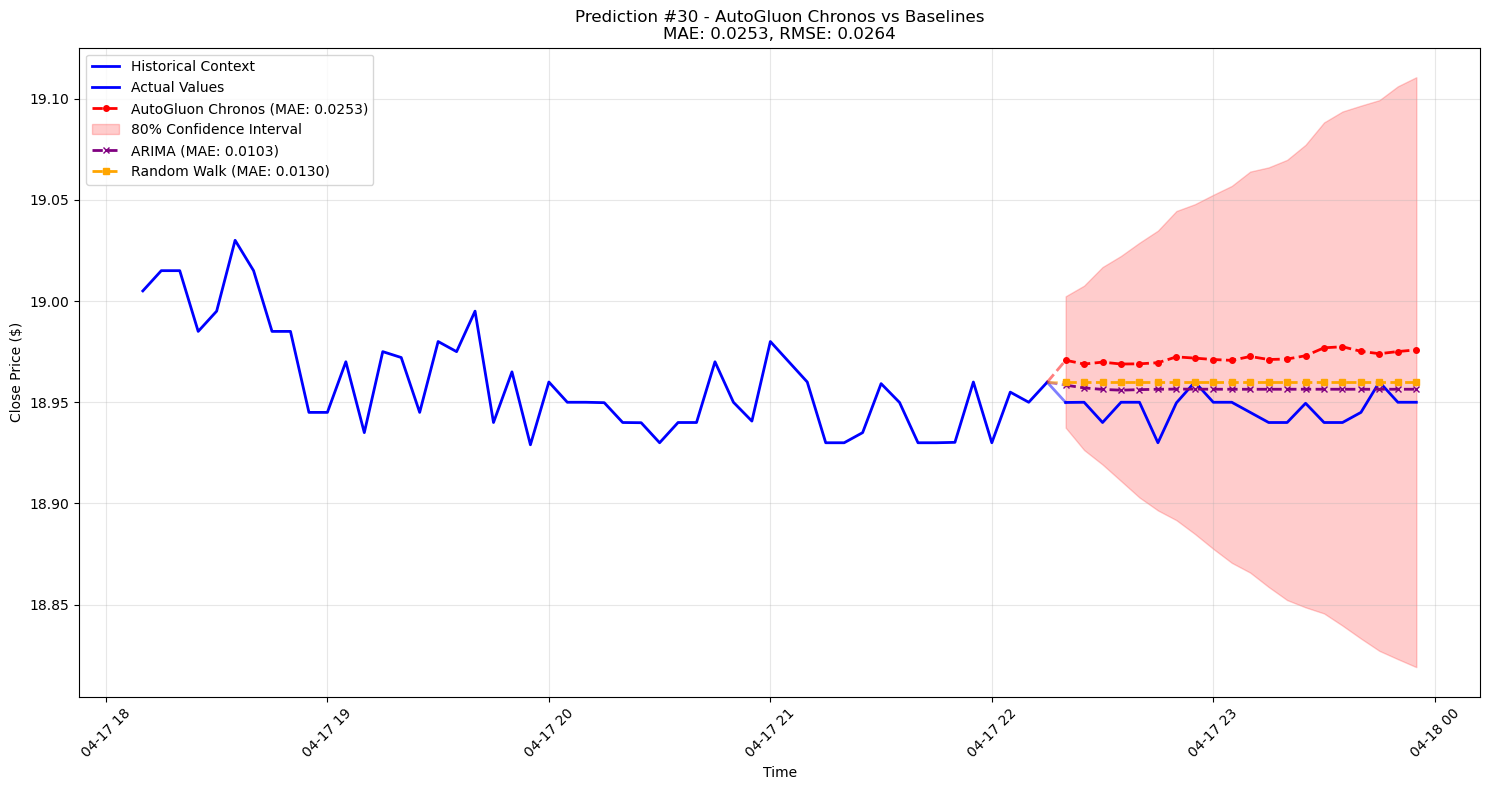

 ✅ AutoGluon - MAE: 0.0253, RMSE: 0.0264
 ✅ ARIMA     - MAE: 0.0103, RMSE: 0.0118
 ✅ Random W. - MAE: 0.0130, RMSE: 0.0147
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_30.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results_chronos\autogluon_5M_INTC\INTC_prediction_30.csv

📊 Summary of results:
   prediction_1: Metrics could not be calculated.
   prediction_2: Metrics could not be calculated.
   prediction_3: AutoGluon MAE=0.0215, RMSE=0.0271
                    ARIMA MAE=0.0198, RMSE=0.0247
                 Random W. MAE=0.0195, RMSE=0.0257
   prediction_4: Metrics could not be calculated.
   prediction_5: AutoGluon MAE=0.0533, RMSE=0.0689
                    ARIMA MAE=0.0757, RMSE=0.0908
                 Random W. MAE=0.0816, RMSE=0.0966
   prediction_6: AutoGluon MAE=0.0418, RMSE=0.0475
   prediction_7: AutoGluon MAE=0.0454, RMSE=0.0527
                    ARIMA MAE=0.0305, RMSE=0.0325
      

In [5]:
prediction_length_test = 20 # We'll test with a horizon of 20
context_window = 200  # Fixed context window size
num_predictions = 30   # Reduced for testing

results = {}

# Create results directory
ticker = "INTC" 
time_interval = "5M" 
results_dir = os.path.join(os.getcwd(), "..", "results_chronos", f'autogluon_{time_interval}_{ticker}')
os.makedirs(results_dir, exist_ok=True)

# Calculate equally spaced prediction points throughout the available data
total_data_length = len(data)

# Define the end points for our testing windows
prediction_end_points = np.linspace(
    context_window + prediction_length_test,
    total_data_length,
    num_predictions,
    dtype=int
)

for i, end_point in enumerate(prediction_end_points):
    start_point = end_point - prediction_length_test
    context_start = start_point - context_window

    if context_start < 0:
        print(f"\n⚠️ Skipping prediction #{i+1} because there is not enough context data.")
        continue
        
    print(f"\n🔍 Making prediction #{i+1} for window ending at {end_point}")

    context_data = data.iloc[context_start:start_point]
    test_data = data.iloc[start_point:end_point]

    print(f"   Context data: rows {context_start} to {start_point-1} ({len(context_data)} rows)")
    print(f"   Test data: rows {start_point} to {end_point-1} ({len(test_data)} rows)")

    # Generate predictions using the globally trained predictor
    predictions_context = predictor.predict(context_data, model="Chronos[bolt_small]")
    
    # The predictor gives `prediction_length` (40) forecasts, we take the first `prediction_length_test` (20)
    predictions_context = predictions_context.head(prediction_length_test)

    # Calculate metrics, handling NaNs
    actual_series = test_data["Close"].dropna()
    
    if not actual_series.empty:
        predicted_series = predictions_context.loc[actual_series.index]["mean"]
        
        actual_values_clean = actual_series.values
        predicted_values_clean = predicted_series.values

        mae = mean_absolute_error(actual_values_clean, predicted_values_clean)
        rmse = np.sqrt(mean_squared_error(actual_values_clean, predicted_values_clean))

        # Generate ARIMA and Random Walk predictions for comparison
        try:
            context_values = context_data['Close'].values
            
            # ARIMA Prediction
            arima_model = ARIMA(context_values, order=(5,1,1))  # Simpler order for stability
            arima_model_fit = arima_model.fit()
            arima_forecast = arima_model_fit.forecast(steps=len(actual_values_clean))
            
            # Random Walk Prediction
            last_value = context_values[-1]
            random_walk_forecast = np.full(shape=len(actual_values_clean), fill_value=last_value)
            
            # Calculate metrics for all models
            mae_arima = mean_absolute_error(actual_values_clean, arima_forecast)
            rmse_arima = np.sqrt(mean_squared_error(actual_values_clean, arima_forecast))
            
            mae_rw = mean_absolute_error(actual_values_clean, random_walk_forecast)
            rmse_rw = np.sqrt(mean_squared_error(actual_values_clean, random_walk_forecast))
            
        except Exception as e:
            print(f"   ⚠️ Error generating baseline forecasts: {e}")
            arima_forecast = np.full(shape=len(actual_values_clean), fill_value=np.nan)
            random_walk_forecast = np.full(shape=len(actual_values_clean), fill_value=np.nan)
            mae_arima = rmse_arima = mae_rw = rmse_rw = np.nan

        print(f"   📊 Plotting prediction #{i+1}...")
        
        # === NEW: Add AutoGluon's predictor.plot() FIRST ===
        print(f"   🎯 AutoGluon native plot for prediction #{i+1}...")
        full_data_for_plot = data.iloc[context_start:end_point]
        
        try:
            predictor.plot(
                data=full_data_for_plot,
                predictions=predictions_context,
                item_ids=data.item_ids,
                max_history_length=context_window // 4,
            )
            plt.title(f'Prediction #{i+1} - AutoGluon Native Plot (MAE: {mae:.4f}, RMSE: {rmse:.4f})')
            plt.show()
        except Exception as e:
            print(f"   ⚠️ AutoGluon native plot failed: {e}")
        
        # === EXISTING: Your custom matplotlib plot with all models ===
        print(f"   📊 Custom comparison plot for prediction #{i+1}...")
        
        # Create enhanced matplotlib plot with all models
        plt.figure(figsize=(15, 8))
        
        # Plot context (last 50 points for better visibility)
        context_to_show = min(50, len(context_data))
        context_subset = context_data.tail(context_to_show)
        context_timestamps = context_subset.index.get_level_values('timestamp')
        context_values_plot = context_subset['Close'].values
        
        # Get the last context value to bridge the gap
        last_context_timestamp = context_data.index.get_level_values('timestamp')[-1]
        last_context_value = context_data['Close'].values[-1]
        
        plt.plot(context_timestamps, context_values_plot, 
                 color='blue', label='Historical Context', linewidth=2)
        
        # Plot actual test values  
        test_timestamps = test_data.index.get_level_values('timestamp')[:len(actual_values_clean)]
        
        # Bridge the gap by connecting last context point to first actual point
        bridge_timestamps = [last_context_timestamp, test_timestamps[0]]
        bridge_values = [last_context_value, actual_values_clean[0]]
        plt.plot(bridge_timestamps, bridge_values, color='blue', linewidth=2, alpha=0.5)
        
        plt.plot(test_timestamps, actual_values_clean, 
                 color='blue', label='Actual Values', linewidth=2)
        
        # Bridge predictions to remove gap
        bridge_pred_timestamps = [last_context_timestamp, test_timestamps[0]]
        bridge_pred_values = [last_context_value, predicted_values_clean[0]]
        plt.plot(bridge_pred_timestamps, bridge_pred_values, 
                 color='red', linestyle='--', linewidth=2, alpha=0.5)
        
        # Plot Chronos predictions
        plt.plot(test_timestamps, predicted_values_clean, 
                 color='red', linestyle='--', marker='o', markersize=4,
                 label=f'AutoGluon Chronos (MAE: {mae:.4f})', linewidth=2)
        
        # Add confidence intervals - check for different possible column names
        confidence_added = False
        possible_lower_cols = ['0.1', 'quantile_0.1', '10%', '0.10']
        possible_upper_cols = ['0.9', 'quantile_0.9', '90%', '0.90']
        
        lower_col = None
        upper_col = None
        
        for col in possible_lower_cols:
            if col in predictions_context.columns:
                lower_col = col
                break
                
        for col in possible_upper_cols:
            if col in predictions_context.columns:
                upper_col = col
                break
        
        if lower_col and upper_col:
            try:
                lower_bound = predictions_context.loc[actual_series.index][lower_col].values
                upper_bound = predictions_context.loc[actual_series.index][upper_col].values
                plt.fill_between(test_timestamps, lower_bound, upper_bound, 
                               color='red', alpha=0.2, label='80% Confidence Interval')
                confidence_added = True
            except Exception as e:
                print(f"   ⚠️ Could not add confidence intervals: {e}")
        
        if not confidence_added:
            print(f"   Available columns in predictions: {list(predictions_context.columns)}")
            # Try to add a simple confidence interval based on standard deviation
            try:
                pred_std = np.std(predicted_values_clean) * 0.5  # Simple approximation
                lower_bound = predicted_values_clean - pred_std
                upper_bound = predicted_values_clean + pred_std
                plt.fill_between(test_timestamps, lower_bound, upper_bound, 
                               color='red', alpha=0.2, label='Approx. Confidence Interval')
            except:
                pass
        
        # Plot other models with gap bridging
        if not np.isnan(mae_arima):
            bridge_arima_values = [last_context_value, arima_forecast[0]]
            plt.plot(bridge_pred_timestamps, bridge_arima_values, 
                     color='purple', linestyle='--', linewidth=2, alpha=0.5)
            plt.plot(test_timestamps, arima_forecast, 
                     color='purple', linestyle='--', marker='x', markersize=4,
                     label=f'ARIMA (MAE: {mae_arima:.4f})', linewidth=2)
        
        if not np.isnan(mae_rw):
            bridge_rw_values = [last_context_value, random_walk_forecast[0]]
            plt.plot(bridge_pred_timestamps, bridge_rw_values, 
                     color='orange', linestyle='--', linewidth=2, alpha=0.5)
            plt.plot(test_timestamps, random_walk_forecast, 
                     color='orange', linestyle='--', marker='s', markersize=4,
                     label=f'Random Walk (MAE: {mae_rw:.4f})', linewidth=2)
        
        plt.title(f'Prediction #{i+1} - AutoGluon Chronos vs Baselines\nMAE: {mae:.4f}, RMSE: {rmse:.4f}')
        plt.xlabel('Time')
        plt.ylabel('Close Price ($)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        # Save the plot
        plot_path = os.path.join(results_dir, f'{ticker}_prediction_{i+1}.png')
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        plt.show()

        # Save CSV data
        csv_data = pd.DataFrame({
            'timestamp': test_timestamps,
            'actual': actual_values_clean,
            'autogluon_chronos': predicted_values_clean,
            'arima_forecast': arima_forecast,
            'random_walk_forecast': random_walk_forecast
        })
        
        # Add confidence intervals if available
        if lower_col and lower_col in predictions_context.columns:
            csv_data['confidence_lower'] = predictions_context.loc[actual_series.index][lower_col].values
        if upper_col and upper_col in predictions_context.columns:
            csv_data['confidence_upper'] = predictions_context.loc[actual_series.index][upper_col].values
        
        csv_path = os.path.join(results_dir, f'{ticker}_prediction_{i+1}.csv')
        csv_data.to_csv(csv_path, index=False)

        results[f"prediction_{i+1}"] = {
            'mae': mae, 'rmse': rmse,
            'mae_arima': mae_arima, 'rmse_arima': rmse_arima,
            'mae_random_walk': mae_rw, 'rmse_random_walk': rmse_rw,
            'predictions': predicted_values_clean,
            'actual': actual_values_clean,
            'timestamps': actual_series.index,
            'context_start': context_start,
            'context_end': start_point,
            'test_start': start_point,
            'test_end': end_point
        }
        print(f" ✅ AutoGluon - MAE: {mae:.4f}, RMSE: {rmse:.4f}")
        if not np.isnan(mae_arima):
            print(f" ✅ ARIMA     - MAE: {mae_arima:.4f}, RMSE: {rmse_arima:.4f}")
        if not np.isnan(mae_rw):
            print(f" ✅ Random W. - MAE: {mae_rw:.4f}, RMSE: {rmse_rw:.4f}")
        print(f" 💾 Saved plot: {plot_path}")
        print(f" 💾 Saved CSV:  {csv_path}")
    else:
        print(f"   ⚠️ No actual (non-NaN) values to compare against. Skipping metrics.")
        results[f"prediction_{i+1}"] = { 'mae': np.nan, 'rmse': np.nan }

print(f"\n📊 Summary of results:")
for pred_name, metrics in results.items():
    if 'mae' in metrics and not np.isnan(metrics['mae']):
        print(f"   {pred_name}: AutoGluon MAE={metrics['mae']:.4f}, RMSE={metrics['rmse']:.4f}")
        if 'mae_arima' in metrics and not np.isnan(metrics['mae_arima']):
            print(f"                    ARIMA MAE={metrics['mae_arima']:.4f}, RMSE={metrics['rmse_arima']:.4f}")
        if 'mae_random_walk' in metrics and not np.isnan(metrics['mae_random_walk']):
            print(f"                 Random W. MAE={metrics['mae_random_walk']:.4f}, RMSE={metrics['rmse_random_walk']:.4f}")
    else:
        print(f"   {pred_name}: Metrics could not be calculated.")

print(f"\n💾 All results saved to: {results_dir}")